In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


import pickle

from tqdm import tqdm
import os

In [2]:
with open('./Sonnets.txt') as f:
    content = f.readlines()

content = [x.strip() for x in content] 

In [3]:
texts = []
z = []
for i in content:
    if i.isnumeric():
        texts.append(z)
        z = []
        continue
    else:
        print(z)
        z.append(i)

[]
['ï»¿THE SONNETS']
[]
['']
['', 'From fairest creatures we desire increase,']
['', 'From fairest creatures we desire increase,', 'That thereby beautyâ€™s rose might never die,']
['', 'From fairest creatures we desire increase,', 'That thereby beautyâ€™s rose might never die,', 'But as the riper should by time decease,']
['', 'From fairest creatures we desire increase,', 'That thereby beautyâ€™s rose might never die,', 'But as the riper should by time decease,', 'His tender heir might bear his memory:']
['', 'From fairest creatures we desire increase,', 'That thereby beautyâ€™s rose might never die,', 'But as the riper should by time decease,', 'His tender heir might bear his memory:', 'But thou contracted to thine own bright eyes,']
['', 'From fairest creatures we desire increase,', 'That thereby beautyâ€™s rose might never die,', 'But as the riper should by time decease,', 'His tender heir might bear his memory:', 'But thou contracted to thine own bright eyes,', 'Feedâ€™st thy ligh

['', 'When forty winters shall besiege thy brow,', 'And dig deep trenches in thy beautyâ€™s field,', 'Thy youthâ€™s proud livery so gazed on now,', 'Will be a tattered weed of small worth held:', 'Then being asked, where all thy beauty lies,', 'Where all the treasure of thy lusty days;', 'To say, within thine own deep sunken eyes,', 'Were an all-eating shame, and thriftless praise.', 'How much more praise deservâ€™d thy beautyâ€™s use,', 'If thou couldst answer â€˜This fair child of mine']
['', 'When forty winters shall besiege thy brow,', 'And dig deep trenches in thy beautyâ€™s field,', 'Thy youthâ€™s proud livery so gazed on now,', 'Will be a tattered weed of small worth held:', 'Then being asked, where all thy beauty lies,', 'Where all the treasure of thy lusty days;', 'To say, within thine own deep sunken eyes,', 'Were an all-eating shame, and thriftless praise.', 'How much more praise deservâ€™d thy beautyâ€™s use,', 'If thou couldst answer â€˜This fair child of mine', 'Shall sum

['', 'Look in thy glass and tell the face thou viewest,', 'Now is the time that face should form another,', 'Whose fresh repair if now thou not renewest,', 'Thou dost beguile the world, unbless some mother.', 'For where is she so fair whose uneared womb', 'Disdains the tillage of thy husbandry?', 'Or who is he so fond will be the tomb', 'Of his self-love to stop posterity?', 'Thou art thy motherâ€™s glass and she in thee', 'Calls back the lovely April of her prime,', 'So thou through windows of thine age shalt see,', 'Despite of wrinkles this thy golden time.', 'But if thou live remembered not to be,', 'Die single and thine image dies with thee.']
['', 'Look in thy glass and tell the face thou viewest,', 'Now is the time that face should form another,', 'Whose fresh repair if now thou not renewest,', 'Thou dost beguile the world, unbless some mother.', 'For where is she so fair whose uneared womb', 'Disdains the tillage of thy husbandry?', 'Or who is he so fond will be the tomb', 'Of h

['', 'Those hours that with gentle work did frame', 'The lovely gaze where every eye doth dwell', 'Will play the tyrants to the very same,', 'And that unfair which fairly doth excel:', 'For never-resting time leads summer on', 'To hideous winter and confounds him there,', 'Sap checked with frost and lusty leaves quite gone,', 'Beauty oâ€™er-snowed and bareness every where:']
['', 'Those hours that with gentle work did frame', 'The lovely gaze where every eye doth dwell', 'Will play the tyrants to the very same,', 'And that unfair which fairly doth excel:', 'For never-resting time leads summer on', 'To hideous winter and confounds him there,', 'Sap checked with frost and lusty leaves quite gone,', 'Beauty oâ€™er-snowed and bareness every where:', 'Then were not summerâ€™s distillation left']
['', 'Those hours that with gentle work did frame', 'The lovely gaze where every eye doth dwell', 'Will play the tyrants to the very same,', 'And that unfair which fairly doth excel:', 'For never-re

['', 'Then let not winterâ€™s ragged hand deface,', 'In thee thy summer ere thou be distilled:', 'Make sweet some vial; treasure thou some place,', 'With beautyâ€™s treasure ere it be self-killed:', 'That use is not forbidden usury,', 'Which happies those that pay the willing loan;', 'Thatâ€™s for thy self to breed another thee,', 'Or ten times happier be it ten for one,', 'Ten times thy self were happier than thou art,', 'If ten of thine ten times refigured thee:', 'Then what could death do if thou shouldst depart,', 'Leaving thee living in posterity?', 'Be not self-willed for thou art much too fair,']
['', 'Then let not winterâ€™s ragged hand deface,', 'In thee thy summer ere thou be distilled:', 'Make sweet some vial; treasure thou some place,', 'With beautyâ€™s treasure ere it be self-killed:', 'That use is not forbidden usury,', 'Which happies those that pay the willing loan;', 'Thatâ€™s for thy self to breed another thee,', 'Or ten times happier be it ten for one,', 'Ten times th

['', 'Music to hear, why hearâ€™st thou music sadly?', 'Sweets with sweets war not, joy delights in joy:', 'Why lovâ€™st thou that which thou receivâ€™st not gladly,', 'Or else receivâ€™st with pleasure thine annoy?', 'If the true concord of well-tuned sounds,', 'By unions married do offend thine ear,']
['', 'Music to hear, why hearâ€™st thou music sadly?', 'Sweets with sweets war not, joy delights in joy:', 'Why lovâ€™st thou that which thou receivâ€™st not gladly,', 'Or else receivâ€™st with pleasure thine annoy?', 'If the true concord of well-tuned sounds,', 'By unions married do offend thine ear,', 'They do but sweetly chide thee, who confounds']
['', 'Music to hear, why hearâ€™st thou music sadly?', 'Sweets with sweets war not, joy delights in joy:', 'Why lovâ€™st thou that which thou receivâ€™st not gladly,', 'Or else receivâ€™st with pleasure thine annoy?', 'If the true concord of well-tuned sounds,', 'By unions married do offend thine ear,', 'They do but sweetly chide thee, who

['', 'Is it for fear to wet a widowâ€™s eye,', 'That thou consumâ€™st thy self in single life?', 'Ah, if thou issueless shalt hap to die,', 'The world will wail thee like a makeless wife,', 'The world will be thy widow and still weep,', 'That thou no form of thee hast left behind,', 'When every private widow well may keep,', 'By childrenâ€™s eyes, her husbandâ€™s shape in mind:', 'Look what an unthrift in the world doth spend', 'Shifts but his place, for still the world enjoys it;', 'But beautyâ€™s waste hath in the world an end,']
['', 'Is it for fear to wet a widowâ€™s eye,', 'That thou consumâ€™st thy self in single life?', 'Ah, if thou issueless shalt hap to die,', 'The world will wail thee like a makeless wife,', 'The world will be thy widow and still weep,', 'That thou no form of thee hast left behind,', 'When every private widow well may keep,', 'By childrenâ€™s eyes, her husbandâ€™s shape in mind:', 'Look what an unthrift in the world doth spend', 'Shifts but his place, for sti

['', 'For shame deny that thou bearâ€™st love to any', 'Who for thy self art so unprovident.', 'Grant if thou wilt, thou art beloved of many,', 'But that thou none lovâ€™st is most evident:', 'For thou art so possessed with murdâ€™rous hate,', 'That â€™gainst thy self thou stickâ€™st not to conspire,', 'Seeking that beauteous roof to ruinate', 'Which to repair should be thy chief desire:', 'O change thy thought, that I may change my mind,', 'Shall hate be fairer lodged than gentle love?', 'Be as thy presence is gracious and kind,', 'Or to thy self at least kind-hearted prove,', 'Make thee another self for love of me,', 'That beauty still may live in thine or thee.']
['', 'For shame deny that thou bearâ€™st love to any', 'Who for thy self art so unprovident.', 'Grant if thou wilt, thou art beloved of many,', 'But that thou none lovâ€™st is most evident:', 'For thou art so possessed with murdâ€™rous hate,', 'That â€™gainst thy self thou stickâ€™st not to conspire,', 'Seeking that beauteo

['', 'When I do count the clock that tells the time,', 'And see the brave day sunk in hideous night,', 'When I behold the violet past prime,', 'And sable curls all silvered oâ€™er with white:', 'When lofty trees I see barren of leaves,']
['', 'When I do count the clock that tells the time,', 'And see the brave day sunk in hideous night,', 'When I behold the violet past prime,', 'And sable curls all silvered oâ€™er with white:', 'When lofty trees I see barren of leaves,', 'Which erst from heat did canopy the herd']
['', 'When I do count the clock that tells the time,', 'And see the brave day sunk in hideous night,', 'When I behold the violet past prime,', 'And sable curls all silvered oâ€™er with white:', 'When lofty trees I see barren of leaves,', 'Which erst from heat did canopy the herd', 'And summerâ€™s green all girded up in sheaves']
['', 'When I do count the clock that tells the time,', 'And see the brave day sunk in hideous night,', 'When I behold the violet past prime,', 'And s

['', 'O that you were your self, but love you are', 'No longer yours, than you your self here live,', 'Against this coming end you should prepare,', 'And your sweet semblance to some other give.', 'So should that beauty which you hold in lease', 'Find no determination, then you were', 'Your self again after your selfâ€™s decease,', 'When your sweet issue your sweet form should bear.', 'Who lets so fair a house fall to decay,', 'Which husbandry in honour might uphold,', 'Against the stormy gusts of winterâ€™s day']
['', 'O that you were your self, but love you are', 'No longer yours, than you your self here live,', 'Against this coming end you should prepare,', 'And your sweet semblance to some other give.', 'So should that beauty which you hold in lease', 'Find no determination, then you were', 'Your self again after your selfâ€™s decease,', 'When your sweet issue your sweet form should bear.', 'Who lets so fair a house fall to decay,', 'Which husbandry in honour might uphold,', 'Again

['', 'Not from the stars do I my judgement pluck,', 'And yet methinks I have astronomy,', 'But not to tell of good, or evil luck,', 'Of plagues, of dearths, or seasonsâ€™ quality,', 'Nor can I fortune to brief minutes tell;', 'Pointing to each his thunder, rain and wind,', 'Or say with princes if it shall go well', 'By oft predict that I in heaven find.', 'But from thine eyes my knowledge I derive,', 'And constant stars in them I read such art', 'As truth and beauty shall together thrive', 'If from thy self, to store thou wouldst convert:', 'Or else of thee this I prognosticate,', 'Thy end is truthâ€™s and beautyâ€™s doom and date.', '']
[]
['']
['', 'When I consider every thing that grows']
['', 'When I consider every thing that grows', 'Holds in perfection but a little moment.']
['', 'When I consider every thing that grows', 'Holds in perfection but a little moment.', 'That this huge stage presenteth nought but shows']
['', 'When I consider every thing that grows', 'Holds in perfecti

['', 'But wherefore do not you a mightier way', 'Make war upon this bloody tyrant Time?', 'And fortify your self in your decay', 'With means more blessed than my barren rhyme?', 'Now stand you on the top of happy hours,', 'And many maiden gardens yet unset,', 'With virtuous wish would bear you living flowers,', 'Much liker than your painted counterfeit:', 'So should the lines of life that life repair']
['', 'But wherefore do not you a mightier way', 'Make war upon this bloody tyrant Time?', 'And fortify your self in your decay', 'With means more blessed than my barren rhyme?', 'Now stand you on the top of happy hours,', 'And many maiden gardens yet unset,', 'With virtuous wish would bear you living flowers,', 'Much liker than your painted counterfeit:', 'So should the lines of life that life repair', 'Which this (Timeâ€™s pencil) or my pupil pen']
['', 'But wherefore do not you a mightier way', 'Make war upon this bloody tyrant Time?', 'And fortify your self in your decay', 'With means

['', 'Who will believe my verse in time to come', 'If it were filled with your most high deserts?', 'Though yet heaven knows it is but as a tomb', 'Which hides your life, and shows not half your parts:', 'If I could write the beauty of your eyes,', 'And in fresh numbers number all your graces,', 'The age to come would say this poet lies,', 'Such heavenly touches neâ€™er touched earthly faces.', 'So should my papers (yellowed with their age)', 'Be scorned, like old men of less truth than tongue,', 'And your true rights be termed a poetâ€™s rage,', 'And stretched metre of an antique song.', 'But were some child of yours alive that time,']
['', 'Who will believe my verse in time to come', 'If it were filled with your most high deserts?', 'Though yet heaven knows it is but as a tomb', 'Which hides your life, and shows not half your parts:', 'If I could write the beauty of your eyes,', 'And in fresh numbers number all your graces,', 'The age to come would say this poet lies,', 'Such heavenl

['', 'Devouring Time blunt thou the lionâ€™s paws,', 'And make the earth devour her own sweet brood,', 'Pluck the keen teeth from the fierce tigerâ€™s jaws,', 'And burn the long-lived phoenix, in her blood,']
['', 'Devouring Time blunt thou the lionâ€™s paws,', 'And make the earth devour her own sweet brood,', 'Pluck the keen teeth from the fierce tigerâ€™s jaws,', 'And burn the long-lived phoenix, in her blood,', 'Make glad and sorry seasons as thou fleetâ€™st,']
['', 'Devouring Time blunt thou the lionâ€™s paws,', 'And make the earth devour her own sweet brood,', 'Pluck the keen teeth from the fierce tigerâ€™s jaws,', 'And burn the long-lived phoenix, in her blood,', 'Make glad and sorry seasons as thou fleetâ€™st,', 'And do whateâ€™er thou wilt swift-footed Time']
['', 'Devouring Time blunt thou the lionâ€™s paws,', 'And make the earth devour her own sweet brood,', 'Pluck the keen teeth from the fierce tigerâ€™s jaws,', 'And burn the long-lived phoenix, in her blood,', 'Make glad an

['', 'A womanâ€™s face with natureâ€™s own hand painted,', 'Hast thou the master mistress of my passion,', 'A womanâ€™s gentle heart but not acquainted', 'With shifting change as is false womenâ€™s fashion,', 'An eye more bright than theirs, less false in rolling:', 'Gilding the object whereupon it gazeth,', 'A man in hue all hues in his controlling,', 'Which steals menâ€™s eyes and womenâ€™s souls amazeth.', 'And for a woman wert thou first created,', 'Till nature as she wrought thee fell a-doting,']
['', 'A womanâ€™s face with natureâ€™s own hand painted,', 'Hast thou the master mistress of my passion,', 'A womanâ€™s gentle heart but not acquainted', 'With shifting change as is false womenâ€™s fashion,', 'An eye more bright than theirs, less false in rolling:', 'Gilding the object whereupon it gazeth,', 'A man in hue all hues in his controlling,', 'Which steals menâ€™s eyes and womenâ€™s souls amazeth.', 'And for a woman wert thou first created,', 'Till nature as she wrought thee fel

['', 'So is it not with me as with that muse,', 'Stirred by a painted beauty to his verse,', 'Who heaven it self for ornament doth use,', 'And every fair with his fair doth rehearse,', 'Making a couplement of proud compare', 'With sun and moon, with earth and seaâ€™s rich gems:', 'With Aprilâ€™s first-born flowers and all things rare,', 'That heavenâ€™s air in this huge rondure hems.', 'O let me true in love but truly write,', 'And then believe me, my love is as fair,', 'As any motherâ€™s child, though not so bright', 'As those gold candles fixed in heavenâ€™s air:', 'Let them say more that like of hearsay well,', 'I will not praise that purpose not to sell.']
['', 'So is it not with me as with that muse,', 'Stirred by a painted beauty to his verse,', 'Who heaven it self for ornament doth use,', 'And every fair with his fair doth rehearse,', 'Making a couplement of proud compare', 'With sun and moon, with earth and seaâ€™s rich gems:', 'With Aprilâ€™s first-born flowers and all things 

['', 'As an unperfect actor on the stage,', 'Who with his fear is put beside his part,', 'Or some fierce thing replete with too much rage,', 'Whose strengthâ€™s abundance weakens his own heart;', 'So I for fear of trust, forget to say,', 'The perfect ceremony of loveâ€™s rite,', 'And in mine own loveâ€™s strength seem to decay,', 'Oâ€™ercharged with burthen of mine own loveâ€™s might:']
['', 'As an unperfect actor on the stage,', 'Who with his fear is put beside his part,', 'Or some fierce thing replete with too much rage,', 'Whose strengthâ€™s abundance weakens his own heart;', 'So I for fear of trust, forget to say,', 'The perfect ceremony of loveâ€™s rite,', 'And in mine own loveâ€™s strength seem to decay,', 'Oâ€™ercharged with burthen of mine own loveâ€™s might:', 'O let my looks be then the eloquence,']
['', 'As an unperfect actor on the stage,', 'Who with his fear is put beside his part,', 'Or some fierce thing replete with too much rage,', 'Whose strengthâ€™s abundance weakens 

['', 'Mine eye hath played the painter and hath stelled,', 'Thy beautyâ€™s form in table of my heart,', 'My body is the frame wherein â€™tis held,', 'And perspective it is best painterâ€™s art.', 'For through the painter must you see his skill,', 'To find where your true image pictured lies,', 'Which in my bosomâ€™s shop is hanging still,', 'That hath his windows glazed with thine eyes:', 'Now see what good turns eyes for eyes have done,', 'Mine eyes have drawn thy shape, and thine for me', 'Are windows to my breast, where-through the sun', 'Delights to peep, to gaze therein on thee;']
['', 'Mine eye hath played the painter and hath stelled,', 'Thy beautyâ€™s form in table of my heart,', 'My body is the frame wherein â€™tis held,', 'And perspective it is best painterâ€™s art.', 'For through the painter must you see his skill,', 'To find where your true image pictured lies,', 'Which in my bosomâ€™s shop is hanging still,', 'That hath his windows glazed with thine eyes:', 'Now see what g

['', 'Lord of my love, to whom in vassalage']
['', 'Lord of my love, to whom in vassalage', 'Thy merit hath my duty strongly knit;']
['', 'Lord of my love, to whom in vassalage', 'Thy merit hath my duty strongly knit;', 'To thee I send this written embassage']
['', 'Lord of my love, to whom in vassalage', 'Thy merit hath my duty strongly knit;', 'To thee I send this written embassage', 'To witness duty, not to show my wit.']
['', 'Lord of my love, to whom in vassalage', 'Thy merit hath my duty strongly knit;', 'To thee I send this written embassage', 'To witness duty, not to show my wit.', 'Duty so great, which wit so poor as mine']
['', 'Lord of my love, to whom in vassalage', 'Thy merit hath my duty strongly knit;', 'To thee I send this written embassage', 'To witness duty, not to show my wit.', 'Duty so great, which wit so poor as mine', 'May make seem bare, in wanting words to show it;']
['', 'Lord of my love, to whom in vassalage', 'Thy merit hath my duty strongly knit;', 'To thee

['', 'Weary with toil, I haste me to my bed,', 'The dear respose for limbs with travel tired,', 'But then begins a journey in my head', 'To work my mind, when bodyâ€™s workâ€™s expired.', 'For then my thoughts (from far where I abide)', 'Intend a zealous pilgrimage to thee,', 'And keep my drooping eyelids open wide,', 'Looking on darkness which the blind do see.', 'Save that my soulâ€™s imaginary sight', 'Presents thy shadow to my sightless view,', 'Which like a jewel (hung in ghastly night)']
['', 'Weary with toil, I haste me to my bed,', 'The dear respose for limbs with travel tired,', 'But then begins a journey in my head', 'To work my mind, when bodyâ€™s workâ€™s expired.', 'For then my thoughts (from far where I abide)', 'Intend a zealous pilgrimage to thee,', 'And keep my drooping eyelids open wide,', 'Looking on darkness which the blind do see.', 'Save that my soulâ€™s imaginary sight', 'Presents thy shadow to my sightless view,', 'Which like a jewel (hung in ghastly night)', 'M

['', 'How can I then return in happy plight', 'That am debarred the benefit of rest?', 'When dayâ€™s oppression is not eased by night,', 'But day by night and night by day oppressed.', 'And each (though enemies to eitherâ€™s reign)', 'Do in consent shake hands to torture me,', 'The one by toil, the other to complain', 'How far I toil, still farther off from thee.', 'I tell the day to please him thou art bright,', 'And dost him grace when clouds do blot the heaven:', 'So flatter I the swart-complexioned night,', 'When sparkling stars twire not thou gildâ€™st the even.', 'But day doth daily draw my sorrows longer,', 'And night doth nightly make griefâ€™s length seem stronger', '']
[]
['']
['', 'When in disgrace with Fortune and menâ€™s eyes,']
['', 'When in disgrace with Fortune and menâ€™s eyes,', 'I all alone beweep my outcast state,']
['', 'When in disgrace with Fortune and menâ€™s eyes,', 'I all alone beweep my outcast state,', 'And trouble deaf heaven with my bootless cries,']
['', 

['', 'When to the sessions of sweet silent thought,', 'I summon up remembrance of things past,', 'I sigh the lack of many a thing I sought,', 'And with old woes new wail my dear timeâ€™s waste:', 'Then can I drown an eye (unused to flow)', 'For precious friends hid in deathâ€™s dateless night,', 'And weep afresh loveâ€™s long since cancelled woe,', 'And moan thâ€™ expense of many a vanished sight.']
['', 'When to the sessions of sweet silent thought,', 'I summon up remembrance of things past,', 'I sigh the lack of many a thing I sought,', 'And with old woes new wail my dear timeâ€™s waste:', 'Then can I drown an eye (unused to flow)', 'For precious friends hid in deathâ€™s dateless night,', 'And weep afresh loveâ€™s long since cancelled woe,', 'And moan thâ€™ expense of many a vanished sight.', 'Then can I grieve at grievances foregone,']
['', 'When to the sessions of sweet silent thought,', 'I summon up remembrance of things past,', 'I sigh the lack of many a thing I sought,', 'And wi

['', 'Thy bosom is endeared with all hearts,', 'Which I by lacking have supposed dead,', 'And there reigns love and all loveâ€™s loving parts,', 'And all those friends which I thought buried.', 'How many a holy and obsequious tear', 'Hath dear religious love stolâ€™n from mine eye,', 'As interest of the dead, which now appear,', 'But things removed that hidden in thee lie.', 'Thou art the grave where buried love doth live,', 'Hung with the trophies of my lovers gone,', 'Who all their parts of me to thee did give,', 'That due of many, now is thine alone.', 'Their images I loved, I view in thee,']
['', 'Thy bosom is endeared with all hearts,', 'Which I by lacking have supposed dead,', 'And there reigns love and all loveâ€™s loving parts,', 'And all those friends which I thought buried.', 'How many a holy and obsequious tear', 'Hath dear religious love stolâ€™n from mine eye,', 'As interest of the dead, which now appear,', 'But things removed that hidden in thee lie.', 'Thou art the grave

['', 'Full many a glorious morning have I seen,', 'Flatter the mountain tops with sovereign eye,', 'Kissing with golden face the meadows green;', 'Gilding pale streams with heavenly alchemy:']
['', 'Full many a glorious morning have I seen,', 'Flatter the mountain tops with sovereign eye,', 'Kissing with golden face the meadows green;', 'Gilding pale streams with heavenly alchemy:', 'Anon permit the basest clouds to ride,']
['', 'Full many a glorious morning have I seen,', 'Flatter the mountain tops with sovereign eye,', 'Kissing with golden face the meadows green;', 'Gilding pale streams with heavenly alchemy:', 'Anon permit the basest clouds to ride,', 'With ugly rack on his celestial face,']
['', 'Full many a glorious morning have I seen,', 'Flatter the mountain tops with sovereign eye,', 'Kissing with golden face the meadows green;', 'Gilding pale streams with heavenly alchemy:', 'Anon permit the basest clouds to ride,', 'With ugly rack on his celestial face,', 'And from the forlor

['', 'Why didst thou promise such a beauteous day,', 'And make me travel forth without my cloak,', 'To let base clouds oâ€™ertake me in my way,', 'Hiding thy bravâ€™ry in their rotten smoke?', 'â€™Tis not enough that through the cloud thou break,', 'To dry the rain on my storm-beaten face,', 'For no man well of such a salve can speak,', 'That heals the wound, and cures not the disgrace:', 'Nor can thy shame give physic to my grief,', 'Though thou repent, yet I have still the loss,', 'Thâ€™ offenderâ€™s sorrow lends but weak relief']
['', 'Why didst thou promise such a beauteous day,', 'And make me travel forth without my cloak,', 'To let base clouds oâ€™ertake me in my way,', 'Hiding thy bravâ€™ry in their rotten smoke?', 'â€™Tis not enough that through the cloud thou break,', 'To dry the rain on my storm-beaten face,', 'For no man well of such a salve can speak,', 'That heals the wound, and cures not the disgrace:', 'Nor can thy shame give physic to my grief,', 'Though thou repent, ye

['', 'No more be grieved at that which thou hast done,', 'Roses have thorns, and silver fountains mud,', 'Clouds and eclipses stain both moon and sun,', 'And loathsome canker lives in sweetest bud.', 'All men make faults, and even I in this,', 'Authorizing thy trespass with compare,', 'My self corrupting salving thy amiss,', 'Excusing thy sins more than thy sins are:', 'For to thy sensual fault I bring in sense,', 'Thy adverse party is thy advocate,', 'And â€™gainst my self a lawful plea commence:', 'Such civil war is in my love and hate,', 'That I an accessary needs must be,', 'To that sweet thief which sourly robs from me.', '']
[]
['']
['', 'Let me confess that we two must be twain,']
['', 'Let me confess that we two must be twain,', 'Although our undivided loves are one:']
['', 'Let me confess that we two must be twain,', 'Although our undivided loves are one:', 'So shall those blots that do with me remain,']
['', 'Let me confess that we two must be twain,', 'Although our undivided

['', 'As a decrepit father takes delight,', 'To see his active child do deeds of youth,', 'So I, made lame by Fortuneâ€™s dearest spite', 'Take all my comfort of thy worth and truth.', 'For whether beauty, birth, or wealth, or wit,', 'Or any of these all, or all, or more', 'Entitled in thy parts, do crowned sit,', 'I make my love engrafted to this store:', 'So then I am not lame, poor, nor despised,']
['', 'As a decrepit father takes delight,', 'To see his active child do deeds of youth,', 'So I, made lame by Fortuneâ€™s dearest spite', 'Take all my comfort of thy worth and truth.', 'For whether beauty, birth, or wealth, or wit,', 'Or any of these all, or all, or more', 'Entitled in thy parts, do crowned sit,', 'I make my love engrafted to this store:', 'So then I am not lame, poor, nor despised,', 'Whilst that this shadow doth such substance give,']
['', 'As a decrepit father takes delight,', 'To see his active child do deeds of youth,', 'So I, made lame by Fortuneâ€™s dearest spite',

['', 'How can my muse want subject to invent', 'While thou dost breathe that pourâ€™st into my verse,', 'Thine own sweet argument, too excellent,', 'For every vulgar paper to rehearse?', 'O give thy self the thanks if aught in me,', 'Worthy perusal stand against thy sight,', 'For whoâ€™s so dumb that cannot write to thee,', 'When thou thy self dost give invention light?', 'Be thou the tenth Muse, ten times more in worth', 'Than those old nine which rhymers invocate,', 'And he that calls on thee, let him bring forth', 'Eternal numbers to outlive long date.', 'If my slight muse do please these curious days,', 'The pain be mine, but thine shall be the praise.']
['', 'How can my muse want subject to invent', 'While thou dost breathe that pourâ€™st into my verse,', 'Thine own sweet argument, too excellent,', 'For every vulgar paper to rehearse?', 'O give thy self the thanks if aught in me,', 'Worthy perusal stand against thy sight,', 'For whoâ€™s so dumb that cannot write to thee,', 'When t

['', 'Take all my loves, my love, yea take them all,', 'What hast thou then more than thou hadst before?', 'No love, my love, that thou mayst true love call,', 'All mine was thine, before thou hadst this more:', 'Then if for my love, thou my love receivest,', 'I cannot blame thee, for my love thou usest,', 'But yet be blamed, if thou thy self deceivest']
['', 'Take all my loves, my love, yea take them all,', 'What hast thou then more than thou hadst before?', 'No love, my love, that thou mayst true love call,', 'All mine was thine, before thou hadst this more:', 'Then if for my love, thou my love receivest,', 'I cannot blame thee, for my love thou usest,', 'But yet be blamed, if thou thy self deceivest', 'By wilful taste of what thy self refusest.']
['', 'Take all my loves, my love, yea take them all,', 'What hast thou then more than thou hadst before?', 'No love, my love, that thou mayst true love call,', 'All mine was thine, before thou hadst this more:', 'Then if for my love, thou m

['', 'Those pretty wrongs that liberty commits,', 'When I am sometime absent from thy heart,', 'Thy beauty, and thy years full well befits,', 'For still temptation follows where thou art.', 'Gentle thou art, and therefore to be won,', 'Beauteous thou art, therefore to be assailed.', 'And when a woman woos, what womanâ€™s son,', 'Will sourly leave her till he have prevailed?', 'Ay me, but yet thou mightst my seat forbear,', 'And chide thy beauty, and thy straying youth,', 'Who lead thee in their riot even there', 'Where thou art forced to break a twofold truth:']
['', 'Those pretty wrongs that liberty commits,', 'When I am sometime absent from thy heart,', 'Thy beauty, and thy years full well befits,', 'For still temptation follows where thou art.', 'Gentle thou art, and therefore to be won,', 'Beauteous thou art, therefore to be assailed.', 'And when a woman woos, what womanâ€™s son,', 'Will sourly leave her till he have prevailed?', 'Ay me, but yet thou mightst my seat forbear,', 'And

['', 'That thou hast her it is not all my grief,', 'And yet it may be said I loved her dearly,', 'That she hath thee is of my wailing chief,', 'A loss in love that touches me more nearly.', 'Loving offenders thus I will excuse ye,', 'Thou dost love her, because thou knowâ€™st I love her,', 'And for my sake even so doth she abuse me,', 'Suffâ€™ring my friend for my sake to approve her.', 'If I lose thee, my loss is my loveâ€™s gain,', 'And losing her, my friend hath found that loss,', 'Both find each other, and I lose both twain,', 'And both for my sake lay on me this cross,', 'But hereâ€™s the joy, my friend and I are one,', 'Sweet flattery, then she loves but me alone.', '']
[]
['']
['', 'When most I wink then do mine eyes best see,']
['', 'When most I wink then do mine eyes best see,', 'For all the day they view things unrespected,']
['', 'When most I wink then do mine eyes best see,', 'For all the day they view things unrespected,', 'But when I sleep, in dreams they look on thee,']


['', 'If the dull substance of my flesh were thought,', 'Injurious distance should not stop my way,', 'For then despite of space I would be brought,', 'From limits far remote, where thou dost stay,', 'No matter then although my foot did stand', 'Upon the farthest earth removed from thee,', 'For nimble thought can jump both sea and land,', 'As soon as think the place where he would be.']
['', 'If the dull substance of my flesh were thought,', 'Injurious distance should not stop my way,', 'For then despite of space I would be brought,', 'From limits far remote, where thou dost stay,', 'No matter then although my foot did stand', 'Upon the farthest earth removed from thee,', 'For nimble thought can jump both sea and land,', 'As soon as think the place where he would be.', 'But ah, thought kills me that I am not thought']
['', 'If the dull substance of my flesh were thought,', 'Injurious distance should not stop my way,', 'For then despite of space I would be brought,', 'From limits far re

['', 'The other two, slight air, and purging fire,', 'Are both with thee, wherever I abide,', 'The first my thought, the other my desire,', 'These present-absent with swift motion slide.', 'For when these quicker elements are gone', 'In tender embassy of love to thee,', 'My life being made of four, with two alone,', 'Sinks down to death, oppressed with melancholy.', 'Until lifeâ€™s composition be recured,', 'By those swift messengers returned from thee,', 'Who even but now come back again assured,', 'Of thy fair health, recounting it to me.', 'This told, I joy, but then no longer glad,']
['', 'The other two, slight air, and purging fire,', 'Are both with thee, wherever I abide,', 'The first my thought, the other my desire,', 'These present-absent with swift motion slide.', 'For when these quicker elements are gone', 'In tender embassy of love to thee,', 'My life being made of four, with two alone,', 'Sinks down to death, oppressed with melancholy.', 'Until lifeâ€™s composition be recur

['', 'Betwixt mine eye and heart a league is took,', 'And each doth good turns now unto the other,', 'When that mine eye is famished for a look,', 'Or heart in love with sighs himself doth smother;', 'With my loveâ€™s picture then my eye doth feast,']
['', 'Betwixt mine eye and heart a league is took,', 'And each doth good turns now unto the other,', 'When that mine eye is famished for a look,', 'Or heart in love with sighs himself doth smother;', 'With my loveâ€™s picture then my eye doth feast,', 'And to the painted banquet bids my heart:']
['', 'Betwixt mine eye and heart a league is took,', 'And each doth good turns now unto the other,', 'When that mine eye is famished for a look,', 'Or heart in love with sighs himself doth smother;', 'With my loveâ€™s picture then my eye doth feast,', 'And to the painted banquet bids my heart:', 'Another time mine eye is my heartâ€™s guest,']
['', 'Betwixt mine eye and heart a league is took,', 'And each doth good turns now unto the other,', 'When

['', 'How careful was I when I took my way,', 'Each trifle under truest bars to thrust,', 'That to my use it might unused stay', 'From hands of falsehood, in sure wards of trust!', 'But thou, to whom my jewels trifles are,', 'Most worthy comfort, now my greatest grief,', 'Thou best of dearest, and mine only care,', 'Art left the prey of every vulgar thief.', 'Thee have I not locked up in any chest,', 'Save where thou art not, though I feel thou art,', 'Within the gentle closure of my breast,']
['', 'How careful was I when I took my way,', 'Each trifle under truest bars to thrust,', 'That to my use it might unused stay', 'From hands of falsehood, in sure wards of trust!', 'But thou, to whom my jewels trifles are,', 'Most worthy comfort, now my greatest grief,', 'Thou best of dearest, and mine only care,', 'Art left the prey of every vulgar thief.', 'Thee have I not locked up in any chest,', 'Save where thou art not, though I feel thou art,', 'Within the gentle closure of my breast,', 'F

['', 'Against that time (if ever that time come)', 'When I shall see thee frown on my defects,', 'When as thy love hath cast his utmost sum,', 'Called to that audit by advised respects,', 'Against that time when thou shalt strangely pass,', 'And scarcely greet me with that sun thine eye,', 'When love converted from the thing it was', 'Shall reasons find of settled gravity;', 'Against that time do I ensconce me here', 'Within the knowledge of mine own desert,', 'And this my hand, against my self uprear,', 'To guard the lawful reasons on thy part,', 'To leave poor me, thou hast the strength of laws,', 'Since why to love, I can allege no cause.', '']
[]
['']
['', 'How heavy do I journey on the way,']
['', 'How heavy do I journey on the way,', 'When what I seek (my weary travelâ€™s end)']
['', 'How heavy do I journey on the way,', 'When what I seek (my weary travelâ€™s end)', 'Doth teach that case and that repose to say']
['', 'How heavy do I journey on the way,', 'When what I seek (my wea

['', 'Thus can my love excuse the slow offence,', 'Of my dull bearer, when from thee I speed,', 'From where thou art, why should I haste me thence?', 'Till I return of posting is no need.', 'O what excuse will my poor beast then find,', 'When swift extremity can seem but slow?', 'Then should I spur though mounted on the wind,', 'In winged speed no motion shall I know,', 'Then can no horse with my desire keep pace,']
['', 'Thus can my love excuse the slow offence,', 'Of my dull bearer, when from thee I speed,', 'From where thou art, why should I haste me thence?', 'Till I return of posting is no need.', 'O what excuse will my poor beast then find,', 'When swift extremity can seem but slow?', 'Then should I spur though mounted on the wind,', 'In winged speed no motion shall I know,', 'Then can no horse with my desire keep pace,', 'Therefore desire (of perfectâ€™st love being made)']
['', 'Thus can my love excuse the slow offence,', 'Of my dull bearer, when from thee I speed,', 'From wher

['', 'So am I as the rich whose blessed key,', 'Can bring him to his sweet up-locked treasure,', 'The which he will not every hour survey,', 'For blunting the fine point of seldom pleasure.', 'Therefore are feasts so solemn and so rare,', 'Since seldom coming in that long year set,', 'Like stones of worth they thinly placed are,', 'Or captain jewels in the carcanet.', 'So is the time that keeps you as my chest', 'Or as the wardrobe which the robe doth hide,', 'To make some special instant special-blest,', 'By new unfolding his imprisoned pride.', 'Blessed are you whose worthiness gives scope,']
['', 'So am I as the rich whose blessed key,', 'Can bring him to his sweet up-locked treasure,', 'The which he will not every hour survey,', 'For blunting the fine point of seldom pleasure.', 'Therefore are feasts so solemn and so rare,', 'Since seldom coming in that long year set,', 'Like stones of worth they thinly placed are,', 'Or captain jewels in the carcanet.', 'So is the time that keeps 

['', 'O how much more doth beauty beauteous seem,', 'By that sweet ornament which truth doth give!', 'The rose looks fair, but fairer we it deem', 'For that sweet odour, which doth in it live:', 'The canker blooms have full as deep a dye,', 'As the perfumed tincture of the roses,']
['', 'O how much more doth beauty beauteous seem,', 'By that sweet ornament which truth doth give!', 'The rose looks fair, but fairer we it deem', 'For that sweet odour, which doth in it live:', 'The canker blooms have full as deep a dye,', 'As the perfumed tincture of the roses,', 'Hang on such thorns, and play as wantonly,']
['', 'O how much more doth beauty beauteous seem,', 'By that sweet ornament which truth doth give!', 'The rose looks fair, but fairer we it deem', 'For that sweet odour, which doth in it live:', 'The canker blooms have full as deep a dye,', 'As the perfumed tincture of the roses,', 'Hang on such thorns, and play as wantonly,', 'When summerâ€™s breath their masked buds discloses:']
['',

['', 'Not marble, nor the gilded monuments', 'Of princes shall outlive this powerful rhyme,', 'But you shall shine more bright in these contents', 'Than unswept stone, besmeared with sluttish time.', 'When wasteful war shall statues overturn,', 'And broils root out the work of masonry,', 'Nor Mars his sword, nor warâ€™s quick fire shall burn:', 'The living record of your memory.', 'â€™Gainst death, and all-oblivious enmity', 'Shall you pace forth, your praise shall still find room,', 'Even in the eyes of all posterity', 'That wear this world out to the ending doom.']
['', 'Not marble, nor the gilded monuments', 'Of princes shall outlive this powerful rhyme,', 'But you shall shine more bright in these contents', 'Than unswept stone, besmeared with sluttish time.', 'When wasteful war shall statues overturn,', 'And broils root out the work of masonry,', 'Nor Mars his sword, nor warâ€™s quick fire shall burn:', 'The living record of your memory.', 'â€™Gainst death, and all-oblivious enmity

['', 'Being your slave what should I do but tend,', 'Upon the hours, and times of your desire?']
['', 'Being your slave what should I do but tend,', 'Upon the hours, and times of your desire?', 'I have no precious time at all to spend;']
['', 'Being your slave what should I do but tend,', 'Upon the hours, and times of your desire?', 'I have no precious time at all to spend;', 'Nor services to do till you require.']
['', 'Being your slave what should I do but tend,', 'Upon the hours, and times of your desire?', 'I have no precious time at all to spend;', 'Nor services to do till you require.', 'Nor dare I chide the world-without-end hour,']
['', 'Being your slave what should I do but tend,', 'Upon the hours, and times of your desire?', 'I have no precious time at all to spend;', 'Nor services to do till you require.', 'Nor dare I chide the world-without-end hour,', 'Whilst I (my sovereign) watch the clock for you,']
['', 'Being your slave what should I do but tend,', 'Upon the hours, an

['', 'That god forbid, that made me first your slave,', 'I should in thought control your times of pleasure,', 'Or at your hand thâ€™ account of hours to crave,', 'Being your vassal bound to stay your leisure.', 'O let me suffer (being at your beck)', 'Thâ€™ imprisoned absence of your liberty,', 'And patience tame to sufferance bide each check,', 'Without accusing you of injury.', 'Be where you list, your charter is so strong,', 'That you your self may privilage your time']
['', 'That god forbid, that made me first your slave,', 'I should in thought control your times of pleasure,', 'Or at your hand thâ€™ account of hours to crave,', 'Being your vassal bound to stay your leisure.', 'O let me suffer (being at your beck)', 'Thâ€™ imprisoned absence of your liberty,', 'And patience tame to sufferance bide each check,', 'Without accusing you of injury.', 'Be where you list, your charter is so strong,', 'That you your self may privilage your time', 'To what you will, to you it doth belong,'

['', 'If there be nothing new, but that which is,', 'Hath been before, how are our brains beguiled,', 'Which labouring for invention bear amis', 'The second burthen of a former child!', 'O that record could with a backward look,', 'Even of five hundred courses of the sun,', 'Show me your image in some antique book,', 'Since mind at first in character was done.', 'That I might see what the old world could say,', 'To this composed wonder of your frame,', 'Whether we are mended, or whether better they,', 'Or whether revolution be the same.', 'O sure I am the wits of former days,', 'To subjects worse have given admiring praise.']
['', 'If there be nothing new, but that which is,', 'Hath been before, how are our brains beguiled,', 'Which labouring for invention bear amis', 'The second burthen of a former child!', 'O that record could with a backward look,', 'Even of five hundred courses of the sun,', 'Show me your image in some antique book,', 'Since mind at first in character was done.', '

['', 'Is it thy will, thy image should keep open', 'My heavy eyelids to the weary night?', 'Dost thou desire my slumbers should be broken,', 'While shadows like to thee do mock my sight?', 'Is it thy spirit that thou sendâ€™st from thee', 'So far from home into my deeds to pry,', 'To find out shames and idle hours in me,']
['', 'Is it thy will, thy image should keep open', 'My heavy eyelids to the weary night?', 'Dost thou desire my slumbers should be broken,', 'While shadows like to thee do mock my sight?', 'Is it thy spirit that thou sendâ€™st from thee', 'So far from home into my deeds to pry,', 'To find out shames and idle hours in me,', 'The scope and tenure of thy jealousy?']
['', 'Is it thy will, thy image should keep open', 'My heavy eyelids to the weary night?', 'Dost thou desire my slumbers should be broken,', 'While shadows like to thee do mock my sight?', 'Is it thy spirit that thou sendâ€™st from thee', 'So far from home into my deeds to pry,', 'To find out shames and idle

['', 'Sin of self-love possesseth all mine eye,', 'And all my soul, and all my every part;', 'And for this sin there is no remedy,', 'It is so grounded inward in my heart.', 'Methinks no face so gracious is as mine,', 'No shape so true, no truth of such account,', 'And for my self mine own worth do define,', 'As I all other in all worths surmount.', 'But when my glass shows me my self indeed', 'beated and chopt with tanned antiquity,', 'Mine own self-love quite contrary I read:', 'Self, so self-loving were iniquity.', 'â€™Tis thee (my self) that for my self I praise,']
['', 'Sin of self-love possesseth all mine eye,', 'And all my soul, and all my every part;', 'And for this sin there is no remedy,', 'It is so grounded inward in my heart.', 'Methinks no face so gracious is as mine,', 'No shape so true, no truth of such account,', 'And for my self mine own worth do define,', 'As I all other in all worths surmount.', 'But when my glass shows me my self indeed', 'beated and chopt with tann

['', 'When I have seen by Timeâ€™s fell hand defaced', 'The rich-proud cost of outworn buried age,', 'When sometime lofty towers I see down-rased,', 'And brass eternal slave to mortal rage.', 'When I have seen the hungry ocean gain']
['', 'When I have seen by Timeâ€™s fell hand defaced', 'The rich-proud cost of outworn buried age,', 'When sometime lofty towers I see down-rased,', 'And brass eternal slave to mortal rage.', 'When I have seen the hungry ocean gain', 'Advantage on the kingdom of the shore,']
['', 'When I have seen by Timeâ€™s fell hand defaced', 'The rich-proud cost of outworn buried age,', 'When sometime lofty towers I see down-rased,', 'And brass eternal slave to mortal rage.', 'When I have seen the hungry ocean gain', 'Advantage on the kingdom of the shore,', 'And the firm soil win of the watery main,']
['', 'When I have seen by Timeâ€™s fell hand defaced', 'The rich-proud cost of outworn buried age,', 'When sometime lofty towers I see down-rased,', 'And brass eternal s

['', 'Since brass, nor stone, nor earth, nor boundless sea,', 'But sad mortality oâ€™ersways their power,', 'How with this rage shall beauty hold a plea,', 'Whose action is no stronger than a flower?', 'O how shall summerâ€™s honey breath hold out,', 'Against the wrackful siege of battâ€™ring days,', 'When rocks impregnable are not so stout,', 'Nor gates of steel so strong but time decays?', 'O fearful meditation, where alack,', 'Shall Timeâ€™s best jewel from Timeâ€™s chest lie hid?', 'Or what strong hand can hold his swift foot back,']
['', 'Since brass, nor stone, nor earth, nor boundless sea,', 'But sad mortality oâ€™ersways their power,', 'How with this rage shall beauty hold a plea,', 'Whose action is no stronger than a flower?', 'O how shall summerâ€™s honey breath hold out,', 'Against the wrackful siege of battâ€™ring days,', 'When rocks impregnable are not so stout,', 'Nor gates of steel so strong but time decays?', 'O fearful meditation, where alack,', 'Shall Timeâ€™s best je

['', 'Tired with all these for restful death I cry,', 'As to behold desert a beggar born,', 'And needy nothing trimmed in jollity,', 'And purest faith unhappily forsworn,', 'And gilded honour shamefully misplaced,', 'And maiden virtue rudely strumpeted,', 'And right perfection wrongfully disgraced,', 'And strength by limping sway disabled', 'And art made tongue-tied by authority,', 'And folly (doctor-like) controlling skill,', 'And simple truth miscalled simplicity,', 'And captive good attending captain ill.', 'Tired with all these, from these would I be gone,', 'Save that to die, I leave my love alone.', '']
[]
['']
['', 'Ah wherefore with infection should he live,']
['', 'Ah wherefore with infection should he live,', 'And with his presence grace impiety,']
['', 'Ah wherefore with infection should he live,', 'And with his presence grace impiety,', 'That sin by him advantage should achieve,']
['', 'Ah wherefore with infection should he live,', 'And with his presence grace impiety,', 'T

['', 'Thus is his cheek the map of days outworn,', 'When beauty lived and died as flowers do now,', 'Before these bastard signs of fair were born,', 'Or durst inhabit on a living brow:', 'Before the golden tresses of the dead,', 'The right of sepulchres, were shorn away,', 'To live a second life on second head,', 'Ere beautyâ€™s dead fleece made another gay:', 'In him those holy antique hours are seen,', 'Without all ornament, it self and true,']
['', 'Thus is his cheek the map of days outworn,', 'When beauty lived and died as flowers do now,', 'Before these bastard signs of fair were born,', 'Or durst inhabit on a living brow:', 'Before the golden tresses of the dead,', 'The right of sepulchres, were shorn away,', 'To live a second life on second head,', 'Ere beautyâ€™s dead fleece made another gay:', 'In him those holy antique hours are seen,', 'Without all ornament, it self and true,', 'Making no summer of anotherâ€™s green,']
['', 'Thus is his cheek the map of days outworn,', 'When

['', 'Those parts of thee that the worldâ€™s eye doth view,', 'Want nothing that the thought of hearts can mend:', 'All tongues (the voice of souls) give thee that due,', 'Uttering bare truth, even so as foes commend.', 'Thy outward thus with outward praise is crowned,', 'But those same tongues that give thee so thine own,', 'In other accents do this praise confound', 'By seeing farther than the eye hath shown.', 'They look into the beauty of thy mind,', 'And that in guess they measure by thy deeds,', 'Then churls their thoughts (although their eyes were kind)', 'To thy fair flower add the rank smell of weeds:', 'But why thy odour matcheth not thy show,', 'The soil is this, that thou dost common grow.']
['', 'Those parts of thee that the worldâ€™s eye doth view,', 'Want nothing that the thought of hearts can mend:', 'All tongues (the voice of souls) give thee that due,', 'Uttering bare truth, even so as foes commend.', 'Thy outward thus with outward praise is crowned,', 'But those same

['', 'No longer mourn for me when I am dead,', 'Than you shall hear the surly sullen bell', 'Give warning to the world that I am fled', 'From this vile world with vilest worms to dwell:', 'Nay if you read this line, remember not,', 'The hand that writ it, for I love you so,', 'That I in your sweet thoughts would be forgot,']
['', 'No longer mourn for me when I am dead,', 'Than you shall hear the surly sullen bell', 'Give warning to the world that I am fled', 'From this vile world with vilest worms to dwell:', 'Nay if you read this line, remember not,', 'The hand that writ it, for I love you so,', 'That I in your sweet thoughts would be forgot,', 'If thinking on me then should make you woe.']
['', 'No longer mourn for me when I am dead,', 'Than you shall hear the surly sullen bell', 'Give warning to the world that I am fled', 'From this vile world with vilest worms to dwell:', 'Nay if you read this line, remember not,', 'The hand that writ it, for I love you so,', 'That I in your sweet 

['', 'O lest the world should task you to recite,', 'What merit lived in me that you should love', 'After my death (dear love) forget me quite,', 'For you in me can nothing worthy prove.', 'Unless you would devise some virtuous lie,', 'To do more for me than mine own desert,', 'And hang more praise upon deceased I,', 'Than niggard truth would willingly impart:', 'O lest your true love may seem false in this,', 'That you for love speak well of me untrue,', 'My name be buried where my body is,', 'And live no more to shame nor me, nor you.', 'For I am shamed by that which I bring forth,']
['', 'O lest the world should task you to recite,', 'What merit lived in me that you should love', 'After my death (dear love) forget me quite,', 'For you in me can nothing worthy prove.', 'Unless you would devise some virtuous lie,', 'To do more for me than mine own desert,', 'And hang more praise upon deceased I,', 'Than niggard truth would willingly impart:', 'O lest your true love may seem false in t

['', 'But be contented when that fell arrest,', 'Without all bail shall carry me away,', 'My life hath in this line some interest,', 'Which for memorial still with thee shall stay.', 'When thou reviewest this, thou dost review,']
['', 'But be contented when that fell arrest,', 'Without all bail shall carry me away,', 'My life hath in this line some interest,', 'Which for memorial still with thee shall stay.', 'When thou reviewest this, thou dost review,', 'The very part was consecrate to thee,']
['', 'But be contented when that fell arrest,', 'Without all bail shall carry me away,', 'My life hath in this line some interest,', 'Which for memorial still with thee shall stay.', 'When thou reviewest this, thou dost review,', 'The very part was consecrate to thee,', 'The earth can have but earth, which is his due,']
['', 'But be contented when that fell arrest,', 'Without all bail shall carry me away,', 'My life hath in this line some interest,', 'Which for memorial still with thee shall st

['', 'So are you to my thoughts as food to life,', 'Or as sweet-seasoned showers are to the ground;', 'And for the peace of you I hold such strife', 'As â€™twixt a miser and his wealth is found.', 'Now proud as an enjoyer, and anon', 'Doubting the filching age will steal his treasure,', 'Now counting best to be with you alone,', 'Then bettered that the world may see my pleasure,', 'Sometime all full with feasting on your sight,', 'And by and by clean starved for a look,', 'Possessing or pursuing no delight', 'Save what is had, or must from you be took.']
['', 'So are you to my thoughts as food to life,', 'Or as sweet-seasoned showers are to the ground;', 'And for the peace of you I hold such strife', 'As â€™twixt a miser and his wealth is found.', 'Now proud as an enjoyer, and anon', 'Doubting the filching age will steal his treasure,', 'Now counting best to be with you alone,', 'Then bettered that the world may see my pleasure,', 'Sometime all full with feasting on your sight,', 'And 

['', 'Thy glass will show thee how thy beauties wear,', 'Thy dial how thy precious minutes waste,', 'These vacant leaves thy mindâ€™s imprint will bear,', 'And of this book, this learning mayst thou taste.']
['', 'Thy glass will show thee how thy beauties wear,', 'Thy dial how thy precious minutes waste,', 'These vacant leaves thy mindâ€™s imprint will bear,', 'And of this book, this learning mayst thou taste.', 'The wrinkles which thy glass will truly show,']
['', 'Thy glass will show thee how thy beauties wear,', 'Thy dial how thy precious minutes waste,', 'These vacant leaves thy mindâ€™s imprint will bear,', 'And of this book, this learning mayst thou taste.', 'The wrinkles which thy glass will truly show,', 'Of mouthed graves will give thee memory,']
['', 'Thy glass will show thee how thy beauties wear,', 'Thy dial how thy precious minutes waste,', 'These vacant leaves thy mindâ€™s imprint will bear,', 'And of this book, this learning mayst thou taste.', 'The wrinkles which thy gl

['', 'So oft have I invoked thee for my muse,', 'And found such fair assistance in my verse,', 'As every alien pen hath got my use,', 'And under thee their poesy disperse.', 'Thine eyes, that taught the dumb on high to sing,', 'And heavy ignorance aloft to fly,', 'Have added feathers to the learnedâ€™s wing,', 'And given grace a double majesty.', 'Yet be most proud of that which I compile,', 'Whose influence is thine, and born of thee,', 'In othersâ€™ works thou dost but mend the style,']
['', 'So oft have I invoked thee for my muse,', 'And found such fair assistance in my verse,', 'As every alien pen hath got my use,', 'And under thee their poesy disperse.', 'Thine eyes, that taught the dumb on high to sing,', 'And heavy ignorance aloft to fly,', 'Have added feathers to the learnedâ€™s wing,', 'And given grace a double majesty.', 'Yet be most proud of that which I compile,', 'Whose influence is thine, and born of thee,', 'In othersâ€™ works thou dost but mend the style,', 'And arts wi

['', 'Whilst I alone did call upon thy aid,', 'My verse alone had all thy gentle grace,', 'But now my gracious numbers are decayed,', 'And my sick muse doth give an other place.', 'I grant (sweet love) thy lovely argument', 'Deserves the travail of a worthier pen,', 'Yet what of thee thy poet doth invent,', 'He robs thee of, and pays it thee again,', 'He lends thee virtue, and he stole that word,', 'From thy behaviour, beauty doth he give', 'And found it in thy cheek: he can afford', 'No praise to thee, but what in thee doth live.', 'Then thank him not for that which he doth say,', 'Since what he owes thee, thou thy self dost pay.', '']
[]
['']
['', 'O how I faint when I of you do write,']
['', 'O how I faint when I of you do write,', 'Knowing a better spirit doth use your name,']
['', 'O how I faint when I of you do write,', 'Knowing a better spirit doth use your name,', 'And in the praise thereof spends all his might,']
['', 'O how I faint when I of you do write,', 'Knowing a better 

['', 'Or I shall live your epitaph to make,', 'Or you survive when I in earth am rotten,', 'From hence your memory death cannot take,', 'Although in me each part will be forgotten.', 'Your name from hence immortal life shall have,', 'Though I (once gone) to all the world must die,', 'The earth can yield me but a common grave,', 'When you entombed in menâ€™s eyes shall lie,', 'Your monument shall be my gentle verse,']
['', 'Or I shall live your epitaph to make,', 'Or you survive when I in earth am rotten,', 'From hence your memory death cannot take,', 'Although in me each part will be forgotten.', 'Your name from hence immortal life shall have,', 'Though I (once gone) to all the world must die,', 'The earth can yield me but a common grave,', 'When you entombed in menâ€™s eyes shall lie,', 'Your monument shall be my gentle verse,', 'Which eyes not yet created shall oâ€™er-read,']
['', 'Or I shall live your epitaph to make,', 'Or you survive when I in earth am rotten,', 'From hence your m

['', 'I grant thou wert not married to my muse,', 'And therefore mayst without attaint oâ€™erlook', 'The dedicated words which writers use', 'Of their fair subject, blessing every book.', 'Thou art as fair in knowledge as in hue,', 'Finding thy worth a limit past my praise,', 'And therefore art enforced to seek anew,', 'Some fresher stamp of the time-bettering days.', 'And do so love, yet when they have devised,', 'What strained touches rhetoric can lend,', 'Thou truly fair, wert truly sympathized,', 'In true plain words, by thy true-telling friend.', 'And their gross painting might be better used,']
['', 'I grant thou wert not married to my muse,', 'And therefore mayst without attaint oâ€™erlook', 'The dedicated words which writers use', 'Of their fair subject, blessing every book.', 'Thou art as fair in knowledge as in hue,', 'Finding thy worth a limit past my praise,', 'And therefore art enforced to seek anew,', 'Some fresher stamp of the time-bettering days.', 'And do so love, yet 

['', 'Who is it that says most, which can say more,', 'Than this rich praise, that you alone, are you?', 'In whose confine immured is the store,', 'Which should example where your equal grew.', 'Lean penury within that pen doth dwell,']
['', 'Who is it that says most, which can say more,', 'Than this rich praise, that you alone, are you?', 'In whose confine immured is the store,', 'Which should example where your equal grew.', 'Lean penury within that pen doth dwell,', 'That to his subject lends not some small glory,']
['', 'Who is it that says most, which can say more,', 'Than this rich praise, that you alone, are you?', 'In whose confine immured is the store,', 'Which should example where your equal grew.', 'Lean penury within that pen doth dwell,', 'That to his subject lends not some small glory,', 'But he that writes of you, if he can tell,']
['', 'Who is it that says most, which can say more,', 'Than this rich praise, that you alone, are you?', 'In whose confine immured is the sto

['', 'My tongue-tied muse in manners holds her still,', 'While comments of your praise richly compiled,', 'Reserve their character with golden quill,', 'And precious phrase by all the Muses filed.', 'I think good thoughts, whilst other write good words,', 'And like unlettered clerk still cry Amen,', 'To every hymn that able spirit affords,', 'In polished form of well refined pen.', 'Hearing you praised, I say â€™tis so, â€™tis true,', 'And to the most of praise add something more,', 'But that is in my thought, whose love to you']
['', 'My tongue-tied muse in manners holds her still,', 'While comments of your praise richly compiled,', 'Reserve their character with golden quill,', 'And precious phrase by all the Muses filed.', 'I think good thoughts, whilst other write good words,', 'And like unlettered clerk still cry Amen,', 'To every hymn that able spirit affords,', 'In polished form of well refined pen.', 'Hearing you praised, I say â€™tis so, â€™tis true,', 'And to the most of prais

['', 'Was it the proud full sail of his great verse,', 'Bound for the prize of (all too precious) you,', 'That did my ripe thoughts in my brain inhearse,', 'Making their tomb the womb wherein they grew?', 'Was it his spirit, by spirits taught to write,', 'Above a mortal pitch, that struck me dead?', 'No, neither he, nor his compeers by night', 'Giving him aid, my verse astonished.', 'He nor that affable familiar ghost', 'Which nightly gulls him with intelligence,', 'As victors of my silence cannot boast,', 'I was not sick of any fear from thence.', 'But when your countenance filled up his line,', 'Then lacked I matter, that enfeebled mine.', '']
[]
['']
['', 'Farewell! thou art too dear for my possessing,']
['', 'Farewell! thou art too dear for my possessing,', 'And like enough thou knowâ€™st thy estimate,']
['', 'Farewell! thou art too dear for my possessing,', 'And like enough thou knowâ€™st thy estimate,', 'The charter of thy worth gives thee releasing:']
['', 'Farewell! thou art to

['', 'When thou shalt be disposed to set me light,', 'And place my merit in the eye of scorn,', 'Upon thy side, against my self Iâ€™ll fight,', 'And prove thee virtuous, though thou art forsworn:', 'With mine own weakness being best acquainted,', 'Upon thy part I can set down a story', 'Of faults concealed, wherein I am attainted:', 'That thou in losing me, shalt win much glory:']
['', 'When thou shalt be disposed to set me light,', 'And place my merit in the eye of scorn,', 'Upon thy side, against my self Iâ€™ll fight,', 'And prove thee virtuous, though thou art forsworn:', 'With mine own weakness being best acquainted,', 'Upon thy part I can set down a story', 'Of faults concealed, wherein I am attainted:', 'That thou in losing me, shalt win much glory:', 'And I by this will be a gainer too,']
['', 'When thou shalt be disposed to set me light,', 'And place my merit in the eye of scorn,', 'Upon thy side, against my self Iâ€™ll fight,', 'And prove thee virtuous, though thou art forswor

['', 'Say that thou didst forsake me for some fault,', 'And I will comment upon that offence,', 'Speak of my lameness, and I straight will halt:', 'Against thy reasons making no defence.', 'Thou canst not (love) disgrace me half so ill,', 'To set a form upon desired change,', 'As Iâ€™ll my self disgrace, knowing thy will,', 'I will acquaintance strangle and look strange:', 'Be absent from thy walks and in my tongue,', 'Thy sweet beloved name no more shall dwell,', 'Lest I (too much profane) should do it wronk:', 'And haply of our old acquaintance tell.', 'For thee, against my self Iâ€™ll vow debate,']
['', 'Say that thou didst forsake me for some fault,', 'And I will comment upon that offence,', 'Speak of my lameness, and I straight will halt:', 'Against thy reasons making no defence.', 'Thou canst not (love) disgrace me half so ill,', 'To set a form upon desired change,', 'As Iâ€™ll my self disgrace, knowing thy will,', 'I will acquaintance strangle and look strange:', 'Be absent from

['', 'Some glory in their birth, some in their skill,', 'Some in their wealth, some in their bodyâ€™s force,', 'Some in their garments though new-fangled ill:', 'Some in their hawks and hounds, some in their horse.', 'And every humour hath his adjunct pleasure,']
['', 'Some glory in their birth, some in their skill,', 'Some in their wealth, some in their bodyâ€™s force,', 'Some in their garments though new-fangled ill:', 'Some in their hawks and hounds, some in their horse.', 'And every humour hath his adjunct pleasure,', 'Wherein it finds a joy above the rest,']
['', 'Some glory in their birth, some in their skill,', 'Some in their wealth, some in their bodyâ€™s force,', 'Some in their garments though new-fangled ill:', 'Some in their hawks and hounds, some in their horse.', 'And every humour hath his adjunct pleasure,', 'Wherein it finds a joy above the rest,', 'But these particulars are not my measure,']
['', 'Some glory in their birth, some in their skill,', 'Some in their wealth, 

['', 'But do thy worst to steal thy self away,', 'For term of life thou art assured mine,', 'And life no longer than thy love will stay,', 'For it depends upon that love of thine.', 'Then need I not to fear the worst of wrongs,', 'When in the least of them my life hath end,', 'I see, a better state to me belongs', 'Than that, which on thy humour doth depend.', 'Thou canst not vex me with inconstant mind,', 'Since that my life on thy revolt doth lie,', 'O what a happy title do I find,']
['', 'But do thy worst to steal thy self away,', 'For term of life thou art assured mine,', 'And life no longer than thy love will stay,', 'For it depends upon that love of thine.', 'Then need I not to fear the worst of wrongs,', 'When in the least of them my life hath end,', 'I see, a better state to me belongs', 'Than that, which on thy humour doth depend.', 'Thou canst not vex me with inconstant mind,', 'Since that my life on thy revolt doth lie,', 'O what a happy title do I find,', 'Happy to have thy

['', 'So shall I live, supposing thou art true,', 'Like a deceived husband, so loveâ€™s face,', 'May still seem love to me, though altered new:', 'Thy looks with me, thy heart in other place.', 'For there can live no hatred in thine eye,', 'Therefore in that I cannot know thy change,', 'In manyâ€™s looks, the false heartâ€™s history', 'Is writ in moods and frowns and wrinkles strange.', 'But heaven in thy creation did decree,', 'That in thy face sweet love should ever dwell,', 'Whateâ€™er thy thoughts, or thy heartâ€™s workings be,', 'Thy looks should nothing thence, but sweetness tell.', 'How like Eveâ€™s apple doth thy beauty grow,', 'If thy sweet virtue answer not thy show.', '']
[]
['']
['', 'They that have power to hurt, and will do none,']
['', 'They that have power to hurt, and will do none,', 'That do not do the thing, they most do show,']
['', 'They that have power to hurt, and will do none,', 'That do not do the thing, they most do show,', 'Who moving others, are themselves a

['', 'How sweet and lovely dost thou make the shame,', 'Which like a canker in the fragrant rose,', 'Doth spot the beauty of thy budding name!', 'O in what sweets dost thou thy sins enclose!', 'That tongue that tells the story of thy days,', '(Making lascivious comments on thy sport)', 'Cannot dispraise, but in a kind of praise,', 'Naming thy name, blesses an ill report.', 'O what a mansion have those vices got,']
['', 'How sweet and lovely dost thou make the shame,', 'Which like a canker in the fragrant rose,', 'Doth spot the beauty of thy budding name!', 'O in what sweets dost thou thy sins enclose!', 'That tongue that tells the story of thy days,', '(Making lascivious comments on thy sport)', 'Cannot dispraise, but in a kind of praise,', 'Naming thy name, blesses an ill report.', 'O what a mansion have those vices got,', 'Which for their habitation chose out thee,']
['', 'How sweet and lovely dost thou make the shame,', 'Which like a canker in the fragrant rose,', 'Doth spot the bea

['', 'Some say thy fault is youth, some wantonness,', 'Some say thy grace is youth and gentle sport,', 'Both grace and faults are loved of more and less:', 'Thou makâ€™st faults graces, that to thee resort:', 'As on the finger of a throned queen,', 'The basest jewel will be well esteemed:', 'So are those errors that in thee are seen,', 'To truths translated, and for true things deemed.', 'How many lambs might the stern wolf betray,', 'If like a lamb he could his looks translate!', 'How many gazers mightst thou lead away,', 'if thou wouldst use the strength of all thy state!', 'But do not so, I love thee in such sort,']
['', 'Some say thy fault is youth, some wantonness,', 'Some say thy grace is youth and gentle sport,', 'Both grace and faults are loved of more and less:', 'Thou makâ€™st faults graces, that to thee resort:', 'As on the finger of a throned queen,', 'The basest jewel will be well esteemed:', 'So are those errors that in thee are seen,', 'To truths translated, and for true

['', 'From you have I been absent in the spring,', 'When proud-pied April (dressed in all his trim)', 'Hath put a spirit of youth in every thing:', 'That heavy Saturn laughed and leaped with him.', 'Yet nor the lays of birds, nor the sweet smell']
['', 'From you have I been absent in the spring,', 'When proud-pied April (dressed in all his trim)', 'Hath put a spirit of youth in every thing:', 'That heavy Saturn laughed and leaped with him.', 'Yet nor the lays of birds, nor the sweet smell', 'Of different flowers in odour and in hue,']
['', 'From you have I been absent in the spring,', 'When proud-pied April (dressed in all his trim)', 'Hath put a spirit of youth in every thing:', 'That heavy Saturn laughed and leaped with him.', 'Yet nor the lays of birds, nor the sweet smell', 'Of different flowers in odour and in hue,', 'Could make me any summerâ€™s story tell:']
['', 'From you have I been absent in the spring,', 'When proud-pied April (dressed in all his trim)', 'Hath put a spirit o

['', 'The forward violet thus did I chide,', 'Sweet thief, whence didst thou steal thy sweet that smells,', 'If not from my loveâ€™s breath? The purple pride', 'Which on thy soft check for complexion dwells,', 'In my loveâ€™s veins thou hast too grossly dyed.', 'The lily I condemned for thy hand,', 'And buds of marjoram had stolâ€™n thy hair,', 'The roses fearfully on thorns did stand,', 'One blushing shame, another white despair:', 'A third nor red, nor white, had stolâ€™n of both,', 'And to his robbery had annexed thy breath,']
['', 'The forward violet thus did I chide,', 'Sweet thief, whence didst thou steal thy sweet that smells,', 'If not from my loveâ€™s breath? The purple pride', 'Which on thy soft check for complexion dwells,', 'In my loveâ€™s veins thou hast too grossly dyed.', 'The lily I condemned for thy hand,', 'And buds of marjoram had stolâ€™n thy hair,', 'The roses fearfully on thorns did stand,', 'One blushing shame, another white despair:', 'A third nor red, nor white

['', 'Where art thou Muse that thou forgetâ€™st so long,', 'To speak of that which gives thee all thy might?', 'Spendâ€™st thou thy fury on some worthless song,', 'Darkening thy power to lend base subjects light?', 'Return forgetful Muse, and straight redeem,', 'In gentle numbers time so idly spent,', 'Sing to the ear that doth thy lays esteem,', 'And gives thy pen both skill and argument.', 'Rise resty Muse, my loveâ€™s sweet face survey,', 'If time have any wrinkle graven there,', 'If any, be a satire to decay,', 'And make timeâ€™s spoils despised everywhere.', 'Give my love fame faster than Time wastes life,']
['', 'Where art thou Muse that thou forgetâ€™st so long,', 'To speak of that which gives thee all thy might?', 'Spendâ€™st thou thy fury on some worthless song,', 'Darkening thy power to lend base subjects light?', 'Return forgetful Muse, and straight redeem,', 'In gentle numbers time so idly spent,', 'Sing to the ear that doth thy lays esteem,', 'And gives thy pen both skill 

['', 'My love is strengthened though more weak in seeming,', 'I love not less, though less the show appear,', 'That love is merchandized, whose rich esteeming,', 'The ownerâ€™s tongue doth publish every where.', 'Our love was new, and then but in the spring,']
['', 'My love is strengthened though more weak in seeming,', 'I love not less, though less the show appear,', 'That love is merchandized, whose rich esteeming,', 'The ownerâ€™s tongue doth publish every where.', 'Our love was new, and then but in the spring,', 'When I was wont to greet it with my lays,']
['', 'My love is strengthened though more weak in seeming,', 'I love not less, though less the show appear,', 'That love is merchandized, whose rich esteeming,', 'The ownerâ€™s tongue doth publish every where.', 'Our love was new, and then but in the spring,', 'When I was wont to greet it with my lays,', 'As Philomel in summerâ€™s front doth sing,']
['', 'My love is strengthened though more weak in seeming,', 'I love not less, th

['', 'Accuse me thus, that I have scanted all,', 'Wherein I should your great deserts repay,', 'Forgot upon your dearest love to call,', 'Whereto all bonds do tie me day by day,', 'That I have frequent been with unknown minds,', 'And given to time your own dear-purchased right,', 'That I have hoisted sail to all the winds', 'Which should transport me farthest from your sight.', 'Book both my wilfulness and errors down,']
['', 'Accuse me thus, that I have scanted all,', 'Wherein I should your great deserts repay,', 'Forgot upon your dearest love to call,', 'Whereto all bonds do tie me day by day,', 'That I have frequent been with unknown minds,', 'And given to time your own dear-purchased right,', 'That I have hoisted sail to all the winds', 'Which should transport me farthest from your sight.', 'Book both my wilfulness and errors down,', 'And on just proof surmise, accumulate,']
['', 'Accuse me thus, that I have scanted all,', 'Wherein I should your great deserts repay,', 'Forgot upon 

['', 'Like as to make our appetite more keen', 'With eager compounds we our palate urge,', 'As to prevent our maladies unseen,', 'We sicken to shun sickness when we purge.', 'Even so being full of your neâ€™er-cloying sweetness,', 'To bitter sauces did I frame my feeding;', 'And sick of welfare found a kind of meetness,', 'To be diseased ere that there was true needing.', 'Thus policy in love tâ€™ anticipate', 'The ills that were not, grew to faults assured,', 'And brought to medicine a healthful state', 'Which rank of goodness would by ill be cured.', 'But thence I learn and find the lesson true,', 'Drugs poison him that so feil sick of you.']
['', 'Like as to make our appetite more keen', 'With eager compounds we our palate urge,', 'As to prevent our maladies unseen,', 'We sicken to shun sickness when we purge.', 'Even so being full of your neâ€™er-cloying sweetness,', 'To bitter sauces did I frame my feeding;', 'And sick of welfare found a kind of meetness,', 'To be diseased ere tha

['', 'That you were once unkind befriends me now,', 'And for that sorrow, which I then did feel,', 'Needs must I under my transgression bow,', 'Unless my nerves were brass or hammered steel.', 'For if you were by my unkindness shaken', 'As I by yours, yâ€™have passed a hell of time,', 'And I a tyrant have no leisure taken']
['', 'That you were once unkind befriends me now,', 'And for that sorrow, which I then did feel,', 'Needs must I under my transgression bow,', 'Unless my nerves were brass or hammered steel.', 'For if you were by my unkindness shaken', 'As I by yours, yâ€™have passed a hell of time,', 'And I a tyrant have no leisure taken', 'To weigh how once I suffered in your crime.']
['', 'That you were once unkind befriends me now,', 'And for that sorrow, which I then did feel,', 'Needs must I under my transgression bow,', 'Unless my nerves were brass or hammered steel.', 'For if you were by my unkindness shaken', 'As I by yours, yâ€™have passed a hell of time,', 'And I a tyrant

['', 'â€™Tis better to be vile than vile esteemed,', 'When not to be, receives reproach of being,', 'And the just pleasure lost, which is so deemed,', 'Not by our feeling, but by othersâ€™ seeing.', 'For why should othersâ€™ false adulterate eyes', 'Give salutation to my sportive blood?', 'Or on my frailties why are frailer spies,', 'Which in their wills count bad what I think good?', 'No, I am that I am, and they that level', 'At my abuses, reckon up their own,', 'I may be straight though they themselves be bevel;', 'By their rank thoughts, my deeds must not be shown']
['', 'â€™Tis better to be vile than vile esteemed,', 'When not to be, receives reproach of being,', 'And the just pleasure lost, which is so deemed,', 'Not by our feeling, but by othersâ€™ seeing.', 'For why should othersâ€™ false adulterate eyes', 'Give salutation to my sportive blood?', 'Or on my frailties why are frailer spies,', 'Which in their wills count bad what I think good?', 'No, I am that I am, and they that 

['', 'No! Time, thou shalt not boast that I do change,', 'Thy pyramids built up with newer might', 'To me are nothing novel, nothing strange,', 'They are but dressings Of a former sight:']
['', 'No! Time, thou shalt not boast that I do change,', 'Thy pyramids built up with newer might', 'To me are nothing novel, nothing strange,', 'They are but dressings Of a former sight:', 'Our dates are brief, and therefore we admire,']
['', 'No! Time, thou shalt not boast that I do change,', 'Thy pyramids built up with newer might', 'To me are nothing novel, nothing strange,', 'They are but dressings Of a former sight:', 'Our dates are brief, and therefore we admire,', 'What thou dost foist upon us that is old,']
['', 'No! Time, thou shalt not boast that I do change,', 'Thy pyramids built up with newer might', 'To me are nothing novel, nothing strange,', 'They are but dressings Of a former sight:', 'Our dates are brief, and therefore we admire,', 'What thou dost foist upon us that is old,', 'And ra

['', 'If my dear love were but the child of state,', 'It might for Fortuneâ€™s bastard be unfathered,', 'As subject to timeâ€™s love or to timeâ€™s hate,', 'Weeds among weeds, or flowers with flowers gathered.', 'No it was builded far from accident,', 'It suffers not in smiling pomp, nor falls', 'Under the blow of thralled discontent,', 'Whereto thâ€™ inviting time our fashion calls:', 'It fears not policy that heretic,', 'Which works on leases of short-numbered hours,', 'But all alone stands hugely politic,']
['', 'If my dear love were but the child of state,', 'It might for Fortuneâ€™s bastard be unfathered,', 'As subject to timeâ€™s love or to timeâ€™s hate,', 'Weeds among weeds, or flowers with flowers gathered.', 'No it was builded far from accident,', 'It suffers not in smiling pomp, nor falls', 'Under the blow of thralled discontent,', 'Whereto thâ€™ inviting time our fashion calls:', 'It fears not policy that heretic,', 'Which works on leases of short-numbered hours,', 'But all

['', 'Wereâ€™t aught to me I bore the canopy,', 'With my extern the outward honouring,', 'Or laid great bases for eternity,', 'Which proves more short than waste or ruining?', 'Have I not seen dwellers on form and favour', 'Lose all, and more by paying too much rent', 'For compound sweet; forgoing simple savour,', 'Pitiful thrivers in their gazing spent?', 'No, let me be obsequious in thy heart,', 'And take thou my oblation, poor but free,', 'Which is not mixed with seconds, knows no art,', 'But mutual render, only me for thee.', 'Hence, thou suborned informer, a true soul', 'When most impeached, stands least in thy control.', '']
[]
['']
['', 'O thou my lovely boy who in thy power,']
['', 'O thou my lovely boy who in thy power,', 'Dost hold Timeâ€™s fickle glass his fickle hour:']
['', 'O thou my lovely boy who in thy power,', 'Dost hold Timeâ€™s fickle glass his fickle hour:', 'Who hast by waning grown, and therein showâ€™st,']
['', 'O thou my lovely boy who in thy power,', 'Dost hol

['', 'In the old age black was not counted fair,', 'Or if it were it bore not beautyâ€™s name:', 'But now is black beautyâ€™s successive heir,', 'And beauty slandered with a bastard shame,', 'For since each hand hath put on natureâ€™s power,', 'Fairing the foul with artâ€™s false borrowed face,', 'Sweet beauty hath no name no holy bower,', 'But is profaned, if not lives in disgrace.', 'Therefore my mistressâ€™ eyes are raven black,', 'Her eyes so suited, and they mourners seem,', 'At such who not born fair no beauty lack,']
['', 'In the old age black was not counted fair,', 'Or if it were it bore not beautyâ€™s name:', 'But now is black beautyâ€™s successive heir,', 'And beauty slandered with a bastard shame,', 'For since each hand hath put on natureâ€™s power,', 'Fairing the foul with artâ€™s false borrowed face,', 'Sweet beauty hath no name no holy bower,', 'But is profaned, if not lives in disgrace.', 'Therefore my mistressâ€™ eyes are raven black,', 'Her eyes so suited, and they mo

['', 'How oft when thou, my music, music playâ€™st,', 'Upon that blessed wood whose motion sounds', 'With thy sweet fingers when thou gently swayâ€™st', 'The wiry concord that mine ear confounds,', 'Do I envy those jacks that nimble leap,', 'To kiss the tender inward of thy hand,', 'Whilst my poor lips which should that harvest reap,', 'At the woodâ€™s boldness by thee blushing stand.', 'To be so tickled they would change their state', 'And situation with those dancing chips,', 'Oâ€™er whom thy fingers walk with gentle gait,', 'Making dead wood more blest than living lips,', 'Since saucy jacks so happy are in this,', 'Give them thy fingers, me thy lips to kiss.', '']
[]
['']
['', 'Thâ€™ expense of spirit in a waste of shame']
['', 'Thâ€™ expense of spirit in a waste of shame', 'Is lust in action, and till action, lust']
['', 'Thâ€™ expense of spirit in a waste of shame', 'Is lust in action, and till action, lust', 'Is perjured, murdâ€™rous, bloody full of blame,']
['', 'Thâ€™ expense o

['', 'My mistressâ€™ eyes are nothing like the sun,', 'Coral is far more red, than her lips red,', 'If snow be white, why then her breasts are dun:', 'If hairs be wires, black wires grow on her head:', 'I have seen roses damasked, red and white,', 'But no such roses see I in her cheeks,', 'And in some perfumes is there more delight,', 'Than in the breath that from my mistress reeks.', 'I love to hear her speak, yet well I know,']
['', 'My mistressâ€™ eyes are nothing like the sun,', 'Coral is far more red, than her lips red,', 'If snow be white, why then her breasts are dun:', 'If hairs be wires, black wires grow on her head:', 'I have seen roses damasked, red and white,', 'But no such roses see I in her cheeks,', 'And in some perfumes is there more delight,', 'Than in the breath that from my mistress reeks.', 'I love to hear her speak, yet well I know,', 'That music hath a far more pleasing sound:']
['', 'My mistressâ€™ eyes are nothing like the sun,', 'Coral is far more red, than her

['', 'Thou art as tyrannous, so as thou art,', 'As those whose beauties proudly make them cruel;', 'For well thou knowâ€™st to my dear doting heart', 'Thou art the fairest and most precious jewel.', 'Yet in good faith some say that thee behold,', 'Thy face hath not the power to make love groan;', 'To say they err, I dare not be so bold,', 'Although I swear it to my self alone.', 'And to be sure that is not false I swear,', 'A thousand groans but thinking on thy face,', 'One on anotherâ€™s neck do witness bear', 'Thy black is fairest in my judgmentâ€™s place.', 'In nothing art thou black save in thy deeds,']
['', 'Those lips that Loveâ€™s own hand did make,', 'Breathed forth the sound that said â€˜I hateâ€™,', 'To me that languished for her sake:', 'But when she saw my woeful state,', 'Straight in her heart did mercy come,', 'Chiding that tongue that ever sweet,', 'Was used in giving gentle doom:', 'And taught it thus anew to greet:', 'â€˜I hateâ€™ she altered with an end,', 'That follo

['', 'My love is as a fever longing still,', 'For that which longer nurseth the disease,', 'Feeding on that which doth preserve the ill,', 'Thâ€™ uncertain sickly appetite to please:']
['', 'My love is as a fever longing still,', 'For that which longer nurseth the disease,', 'Feeding on that which doth preserve the ill,', 'Thâ€™ uncertain sickly appetite to please:', 'My reason the physician to my love,']
['', 'My love is as a fever longing still,', 'For that which longer nurseth the disease,', 'Feeding on that which doth preserve the ill,', 'Thâ€™ uncertain sickly appetite to please:', 'My reason the physician to my love,', 'Angry that his prescriptions are not kept']
['', 'My love is as a fever longing still,', 'For that which longer nurseth the disease,', 'Feeding on that which doth preserve the ill,', 'Thâ€™ uncertain sickly appetite to please:', 'My reason the physician to my love,', 'Angry that his prescriptions are not kept', 'Hath left me, and I desperate now approve,']
['', 'M

['', 'O me! what eyes hath love put in my head,', 'Which have no correspondence with true sight,', 'Or if they have, where is my judgment fled,', 'That censures falsely what they see aright?', 'If that be fair whereon my false eyes dote,', 'What means the world to say it is not so?', 'If it be not, then love doth well denote,', 'Loveâ€™s eye is not so true as all menâ€™s: no,', 'How can it? O how can loveâ€™s eye be true,', 'That is so vexed with watching and with tears?', 'No marvel then though I mistake my view,']
['', 'O me! what eyes hath love put in my head,', 'Which have no correspondence with true sight,', 'Or if they have, where is my judgment fled,', 'That censures falsely what they see aright?', 'If that be fair whereon my false eyes dote,', 'What means the world to say it is not so?', 'If it be not, then love doth well denote,', 'Loveâ€™s eye is not so true as all menâ€™s: no,', 'How can it? O how can loveâ€™s eye be true,', 'That is so vexed with watching and with tears?', 

['', 'Canst thou O cruel, say I love thee not,', 'When I against my self with thee partake?', 'Do I not think on thee when I forgot', 'Am of my self, all-tyrant, for thy sake?', 'Who hateth thee that I do call my friend,', 'On whom frownâ€™st thou that I do fawn upon,', 'Nay if thou lourâ€™st on me do I not spend', 'Revenge upon my self with present moan?', 'What merit do I in my self respect,', 'That is so proud thy service to despise,', 'When all my best doth worship thy defect,', 'Commanded by the motion of thine eyes?', 'But love hate on for now I know thy mind,', 'Those that can see thou lovâ€™st, and I am blind.', '']
[]
['']
['', 'O from what power hast thou this powerful might,']
['', 'O from what power hast thou this powerful might,', 'With insufficiency my heart to sway,']
['', 'O from what power hast thou this powerful might,', 'With insufficiency my heart to sway,', 'To make me give the lie to my true sight,']
['', 'O from what power hast thou this powerful might,', 'With i

['', 'Love is too young to know what conscience is,', 'Yet who knows not conscience is born of love?', 'Then gentle cheater urge not my amiss,', 'Lest guilty of my faults thy sweet self prove.', 'For thou betraying me, I do betray', 'My nobler part to my gross bodyâ€™s treason,', 'My soul doth tell my body that he may,', 'Triumph in love, flesh stays no farther reason,', 'But rising at thy name doth point out thee,']
['', 'Love is too young to know what conscience is,', 'Yet who knows not conscience is born of love?', 'Then gentle cheater urge not my amiss,', 'Lest guilty of my faults thy sweet self prove.', 'For thou betraying me, I do betray', 'My nobler part to my gross bodyâ€™s treason,', 'My soul doth tell my body that he may,', 'Triumph in love, flesh stays no farther reason,', 'But rising at thy name doth point out thee,', 'As his triumphant prize, proud of this pride,']
['', 'Love is too young to know what conscience is,', 'Yet who knows not conscience is born of love?', 'Then 

['', 'In loving thee thou knowâ€™st I am forsworn,', 'But thou art twice forsworn to me love swearing,', 'In act thy bed-vow broke and new faith torn,', 'In vowing new hate after new love bearing:', 'But why of two oathsâ€™ breach do I accuse thee,', 'When I break twenty? I am perjured most,', 'For all my vows are oaths but to misuse thee:', 'And all my honest faith in thee is lost.', 'For I have sworn deep oaths of thy deep kindness:', 'Oaths of thy love, thy truth, thy constancy,', 'And to enlighten thee gave eyes to blindness,', 'Or made them swear against the thing they see.', 'For I have sworn thee fair: more perjured I,']
['', 'In loving thee thou knowâ€™st I am forsworn,', 'But thou art twice forsworn to me love swearing,', 'In act thy bed-vow broke and new faith torn,', 'In vowing new hate after new love bearing:', 'But why of two oathsâ€™ breach do I accuse thee,', 'When I break twenty? I am perjured most,', 'For all my vows are oaths but to misuse thee:', 'And all my honest f

['', 'The little Love-god lying once asleep,', 'Laid by his side his heart-inflaming brand,', 'Whilst many nymphs that vowed chaste life to keep,', 'Came tripping by, but in her maiden hand,', 'The fairest votary took up that fire,']
['', 'The little Love-god lying once asleep,', 'Laid by his side his heart-inflaming brand,', 'Whilst many nymphs that vowed chaste life to keep,', 'Came tripping by, but in her maiden hand,', 'The fairest votary took up that fire,', 'Which many legions of true hearts had warmed,']
['', 'The little Love-god lying once asleep,', 'Laid by his side his heart-inflaming brand,', 'Whilst many nymphs that vowed chaste life to keep,', 'Came tripping by, but in her maiden hand,', 'The fairest votary took up that fire,', 'Which many legions of true hearts had warmed,', 'And so the general of hot desire,']
['', 'The little Love-god lying once asleep,', 'Laid by his side his heart-inflaming brand,', 'Whilst many nymphs that vowed chaste life to keep,', 'Came tripping 

In [4]:
t = []
for i in texts:
    x = ' '.join(i)
    print(x)
    print('------')
    t.append(x)

ï»¿THE SONNETS 
------
 From fairest creatures we desire increase, That thereby beautyâ€™s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feedâ€™st thy lightâ€™s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the worldâ€™s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, makâ€™st waste in niggarding: Pity the world, or else this glutton be, To eat the worldâ€™s due, by the grave and thee.  
------
 When forty winters shall besiege thy brow, And dig deep trenches in thy beautyâ€™s field, Thy youthâ€™s proud livery so gazed on now, Will be a tattered weed of small worth held: Then being asked, where all thy beauty lies, Where all the treasure of thy lusty days; To say, within thine own deep sunken eyes, Were an all-eating shame, and thr

 O that you were your self, but love you are No longer yours, than you your self here live, Against this coming end you should prepare, And your sweet semblance to some other give. So should that beauty which you hold in lease Find no determination, then you were Your self again after your selfâ€™s decease, When your sweet issue your sweet form should bear. Who lets so fair a house fall to decay, Which husbandry in honour might uphold, Against the stormy gusts of winterâ€™s day And barren rage of deathâ€™s eternal cold? O none but unthrifts, dear my love you know, You had a father, let your son say so.  
------
 Not from the stars do I my judgement pluck, And yet methinks I have astronomy, But not to tell of good, or evil luck, Of plagues, of dearths, or seasonsâ€™ quality, Nor can I fortune to brief minutes tell; Pointing to each his thunder, rain and wind, Or say with princes if it shall go well By oft predict that I in heaven find. But from thine eyes my knowledge I derive, And cons

 Let those who are in favour with their stars, Of public honour and proud titles boast, Whilst I whom fortune of such triumph bars Unlooked for joy in that I honour most; Great princesâ€™ favourites their fair leaves spread, But as the marigold at the sunâ€™s eye, And in themselves their pride lies buried, For at a frown they in their glory die. The painful warrior famoused for fight, After a thousand victories once foiled, Is from the book of honour razed quite, And all the rest forgot for which he toiled: Then happy I that love and am beloved Where I may not remove nor be removed.  
------
 Lord of my love, to whom in vassalage Thy merit hath my duty strongly knit; To thee I send this written embassage To witness duty, not to show my wit. Duty so great, which wit so poor as mine May make seem bare, in wanting words to show it; But that I hope some good conceit of thine In thy soulâ€™s thought (all naked) will bestow it: Till whatsoever star that guides my moving, Points on me graciou

 How can my muse want subject to invent While thou dost breathe that pourâ€™st into my verse, Thine own sweet argument, too excellent, For every vulgar paper to rehearse? O give thy self the thanks if aught in me, Worthy perusal stand against thy sight, For whoâ€™s so dumb that cannot write to thee, When thou thy self dost give invention light? Be thou the tenth Muse, ten times more in worth Than those old nine which rhymers invocate, And he that calls on thee, let him bring forth Eternal numbers to outlive long date. If my slight muse do please these curious days, The pain be mine, but thine shall be the praise.  
------
 O how thy worth with manners may I sing, When thou art all the better part of me? What can mine own praise to mine own self bring: And what isâ€™t but mine own when I praise thee? Even for this, let us divided live, And our dear love lose name of single one, That by this separation I may give: That due to thee which thou deservâ€™st alone: O absence what a torment wo

In [5]:
data = pd.DataFrame(t[1:], columns=['sonnet'])

In [6]:
data.to_csv('sonnets_tabular.csv')

In [7]:
data = pd.read_csv('./sonnets_tabular.csv')

In [8]:
data.head()

,Unnamed: 0,sonnet
0,0,"From fairest creatures we desire increase, Th..."
1,1,"When forty winters shall besiege thy brow, An..."
2,2,Look in thy glass and tell the face thou view...
3,3,"Unthrifty loveliness why dost thou spend, Upo..."
4,4,Those hours that with gentle work did frame T...


In [9]:
# printing some random sonnets
sent_0 = data['sonnet'].values[0]
print(sent_0)
print("="*50)

sent_10 = data['sonnet'].values[10]
print(sent_10)
print("="*50)

sent_15 = data['sonnet'].values[15]
print(sent_15)
print("="*50)

sent_49 = data['sonnet'].values[49]
print(sent_49)
print("="*50)

 From fairest creatures we desire increase, That thereby beautyâ€™s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feedâ€™st thy lightâ€™s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the worldâ€™s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, makâ€™st waste in niggarding: Pity the world, or else this glutton be, To eat the worldâ€™s due, by the grave and thee.  
 As fast as thou shalt wane so fast thou growâ€™st, In one of thine, from that which thou departest, And that fresh blood which youngly thou bestowâ€™st, Thou mayst call thine, when thou from youth convertest, Herein lives wisdom, beauty, and increase, Without this folly, age, and cold decay, If all were minded so, the times should cease, And threescore year would make t

In [10]:
# remove urls from text python
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_10 = re.sub(r"http\S+", "", sent_10)
sent_15 = re.sub(r"http\S+", "", sent_15)
sent_49 = re.sub(r"http\S+", "", sent_49)

print(sent_0)

 From fairest creatures we desire increase, That thereby beautyâ€™s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feedâ€™st thy lightâ€™s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the worldâ€™s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, makâ€™st waste in niggarding: Pity the world, or else this glutton be, To eat the worldâ€™s due, by the grave and thee.  


In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent_15 = decontracted(sent_15)
print(sent_15)
print("="*50)

 But wherefore do not you a mightier way Make war upon this bloody tyrant Time? And fortify your self in your decay With means more blessed than my barren rhyme? Now stand you on the top of happy hours, And many maiden gardens yet unset, With virtuous wish would bear you living flowers, Much liker than your painted counterfeit: So should the lines of life that life repair Which this (Timeâ€™s pencil) or my pupil pen Neither in inward worth nor outward fair Can make you live your self in eyes of men. To give away your self, keeps your self still, And you must live drawn by your own sweet skill.  


In [13]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

From fairest creatures we desire increase, That thereby beautyâ€™s rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou contracted to thine own bright eyes, Feedâ€™st thy lightâ€™s flame with self-substantial fuel, Making a famine where abundance lies, Thy self thy foe, to thy sweet self too cruel: Thou that art now the worldâ€™s fresh ornament, And only herald to the gaudy spring, Within thine own bud buriest thy content, And, tender churl, makâ€™st waste in niggarding: Pity the world, or else this glutton be, To eat the worldâ€™s due, by the grave and thee.


In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_15 = re.sub('[^A-Za-z0-9]+', ' ', sent_15)
print(sent_15)

 But wherefore do not you a mightier way Make war upon this bloody tyrant Time And fortify your self in your decay With means more blessed than my barren rhyme Now stand you on the top of happy hours And many maiden gardens yet unset With virtuous wish would bear you living flowers Much liker than your painted counterfeit So should the lines of life that life repair Which this Time s pencil or my pupil pen Neither in inward worth nor outward fair Can make you live your self in eyes of men To give away your self keeps your self still And you must live drawn by your own sweet skill 


In [15]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_sonnets = []
# tqdm is for printing the status bar
for sentance in tqdm(data['sonnet'].values):
    sentance = re.sub(r"http\S+", "", sentance)
     #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_sonnets.append(sentance.strip())

100%|██████████████████████████████████████| 153/153 [00:00<00:00, 3187.38it/s]


In [17]:
preprocessed_sonnets

['fairest creatures desire increase thereby beauty rose might never die riper time decease tender heir might bear memory thou contracted thine bright eyes feed st thy light flame self substantial fuel making famine abundance lies thy self thy foe thy sweet self cruel thou art world fresh ornament herald gaudy spring within thine bud buriest thy content tender churl mak st waste niggarding pity world else glutton eat world due grave thee',
 'forty winters shall besiege thy brow dig deep trenches thy beauty field thy youth proud livery gazed tattered weed small worth held asked thy beauty lies treasure thy lusty days say within thine deep sunken eyes eating shame thriftless praise much praise deserv thy beauty use thou couldst answer fair child mine shall sum count make old excuse proving beauty succession thine new made thou art old see thy blood warm thou feel st cold',
 'look thy glass tell face thou viewest time face form another whose fresh repair thou not renewest thou dost beguile

In [18]:
processed_sonnets = pd.DataFrame(preprocessed_sonnets, columns=['processed sonnets'])

## Most important word of each sonnet

In [19]:
len(preprocessed_sonnets)

153

In [20]:
tf_idf_vect = TfidfVectorizer(min_df=5)
tf_idf_vect.fit(preprocessed_sonnets)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_sonnets)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including unigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['absence', 'age', 'ah', 'alone', 'although', 'another', 'antique', 'argument', 'art', 'away']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (153, 371)
the number of unique words including unigrams  371


In [21]:
features = tf_idf_vect.get_feature_names()

In [22]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [23]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


In [24]:
z = []
for i in range(len(preprocessed_sonnets)):
    z.append(top_feats_in_doc(final_tf_idf,features, i , top_n = 1)['feature'][0])

In [25]:
imp_tf = pd.DataFrame(z, columns=['Most important word'])

## Most frequent word of each sonnet.

In [26]:
count_vector = CountVectorizer(preprocessed_sonnets)
count_vector.fit(preprocessed_sonnets)
count_vector.get_feature_names()

['abhor',
 'abide',
 'able',
 'absence',
 'absent',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abysm',
 'accents',
 'acceptable',
 'acceptance',
 'accessary',
 'accident',
 'accidents',
 'account',
 'accumulate',
 'accuse',
 'accusing',
 'achieve',
 'acknowledge',
 'acquaintance',
 'acquainted',
 'act',
 'action',
 'active',
 'actor',
 'add',
 'added',
 'adder',
 'addeth',
 'adding',
 'addition',
 'adieu',
 'adjunct',
 'admire',
 'admired',
 'admiring',
 'admit',
 'admitted',
 'adonis',
 'adore',
 'adulterate',
 'advance',
 'advantage',
 'adverse',
 'advised',
 'advocate',
 'afar',
 'affable',
 'affairs',
 'affections',
 'afford',
 'affords',
 'afloat',
 'afresh',
 'afterwards',
 'age',
 'ages',
 'aggravate',
 'ah',
 'aid',
 'air',
 'alack',
 'alas',
 'alchemy',
 'alien',
 'alike',
 'alive',
 'allayed',
 'allege',
 'allow',
 'almost',
 'aloft',
 'alone',
 'already',
 'alt',
 'alter',
 'alteration',
 'altered',
 'alters',
 'although',
 'always',
 'amazeth',
 'ambush',


In [27]:
doc_array = count_vector.transform(preprocessed_sonnets).toarray()
doc_array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
frequency_matrix = pd.DataFrame(doc_array,index=preprocessed_sonnets,columns=count_vector.get_feature_names())
frequency_matrix.head(1)

,abhor,abide,able,absence,absent,abundance,abundant,abuse,abused,abuses,...,yellow,yellowed,yet,yield,yore,young,youngly,youth,youthful,zealous
fairest creatures desire increase thereby beauty rose might never die riper time decease tender heir might bear memory thou contracted thine bright eyes feed st thy light flame self substantial fuel making famine abundance lies thy self thy foe thy sweet self cruel thou art world fresh ornament herald gaudy spring within thine bud buriest thy content tender churl mak st waste niggarding pity world else glutton eat world due grave thee,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
z = []
for i in range(len(frequency_matrix)):
    z.append(frequency_matrix.iloc[i].idxmax())

In [30]:
most_frequent = pd.DataFrame(z, columns=['Most frequent word'])

In [31]:
df = processed_sonnets['processed sonnets'].str.cat(imp_tf['Most important word'])

### Tagging each sonet with its Most frequent and Most important word.

In [32]:
final_data = pd.concat([processed_sonnets, most_frequent['Most frequent word'], imp_tf['Most important word']], axis=1)
final_data.head()

,processed sonnets,Most frequent word,Most important word
0,fairest creatures desire increase thereby beau...,thy,world
1,forty winters shall besiege thy brow dig deep ...,thy,thy
2,look thy glass tell face thou viewest time fac...,thou,thou
3,unthrifty loveliness dost thou spend upon thy ...,thy,dost
4,hours gentle work frame lovely gaze every eye ...,beauty,winter


In [33]:
final_data

,processed sonnets,Most frequent word,Most important word
0,fairest creatures desire increase thereby beau...,thy,world
1,forty winters shall besiege thy brow dig deep ...,thy,thy
2,look thy glass tell face thou viewest time fac...,thou,thou
3,unthrifty loveliness dost thou spend upon thy ...,thy,dost
4,hours gentle work frame lovely gaze every eye ...,beauty,winter
5,let not winter ragged hand deface thee thy sum...,ten,times
6,lo orient gracious light lifts burning head ey...,age,looks
7,music hear hear st thou music sadly sweets swe...,thou,one
8,fear wet widow eye thou consum st thy self sin...,world,world
9,shame deny thou bear st love thy self art unpr...,thou,thy


## Related sonnets

We are clustering the related sonnets together.

In [34]:
# Generating bag of words features.
count_vect = CountVectorizer()
bow = count_vect.fit_transform(preprocessed_sonnets)
bow.shape

(153, 2947)

In [35]:
# Importing k-Means class from sklearn
from sklearn.cluster import KMeans

In [36]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

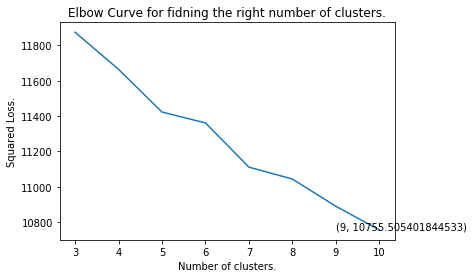

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  10755.505401844533


In [37]:
# Choosing the best cluster using Elbow Method.
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster, n_jobs = -1).fit(bow) # Training Clustering.
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [38]:
# Training the best model --
model = KMeans(n_clusters = optimal_clusters, n_jobs = -1)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
# Giving Labels/assigning a cluster to each sonnet
df = data
df['Label'] = model.labels_
df.head(5)

,Unnamed: 0,sonnet,Label
0,0,"From fairest creatures we desire increase, Th...",1
1,1,"When forty winters shall besiege thy brow, An...",1
2,2,Look in thy glass and tell the face thou view...,1
3,3,"Unthrifty loveliness why dost thou spend, Upo...",4
4,4,Those hours that with gentle work did frame T...,8


In [40]:
# How many sonnet belong to each cluster ->
df.groupby(['Label'])['sonnet'].count()

Label
0    16
1    15
2    20
3    29
4     7
5     6
6     9
7     5
8    46
Name: sonnet, dtype: int64

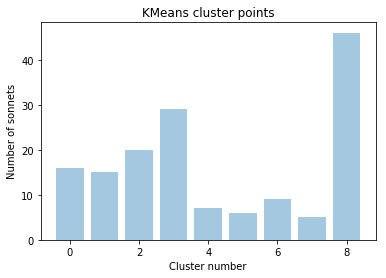

In [43]:
plt.bar([x for x in range(optimal_clusters)], df.groupby(['Label'])['sonnet'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of sonnets")
plt.show()

In [42]:
# Reading a sonet which belong to each group.
for i in range(optimal_clusters):
    print("A sonnet of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Label']).groups[i][0]]['sonnet'])
    print('\n')
    print("_" * 70)

A sonnet of assigned to cluster  0
----------------------------------------------------------------------
 When I do count the clock that tells the time, And see the brave day sunk in hideous night, When I behold the violet past prime, And sable curls all silvered oâ€™er with white: When lofty trees I see barren of leaves, Which erst from heat did canopy the herd And summerâ€™s green all girded up in sheaves Borne on the bier with white and bristly beard: Then of thy beauty do I question make That thou among the wastes of time must go, Since sweets and beauties do themselves forsake, And die as fast as they see others grow, And nothing â€™gainst Timeâ€™s scythe can make defence Save breed to brave him, when he takes thee hence.  


______________________________________________________________________
A sonnet of assigned to cluster  1
----------------------------------------------------------------------
 From fairest creatures we desire increase, That thereby beautyâ€™s rose might ne